In [1]:
import scripts.framework as fr
import scripts.headrpp_alg as headrpp
import scripts.dijkstra_alg as dijkstra
import scripts.NSGA2 as nsga2

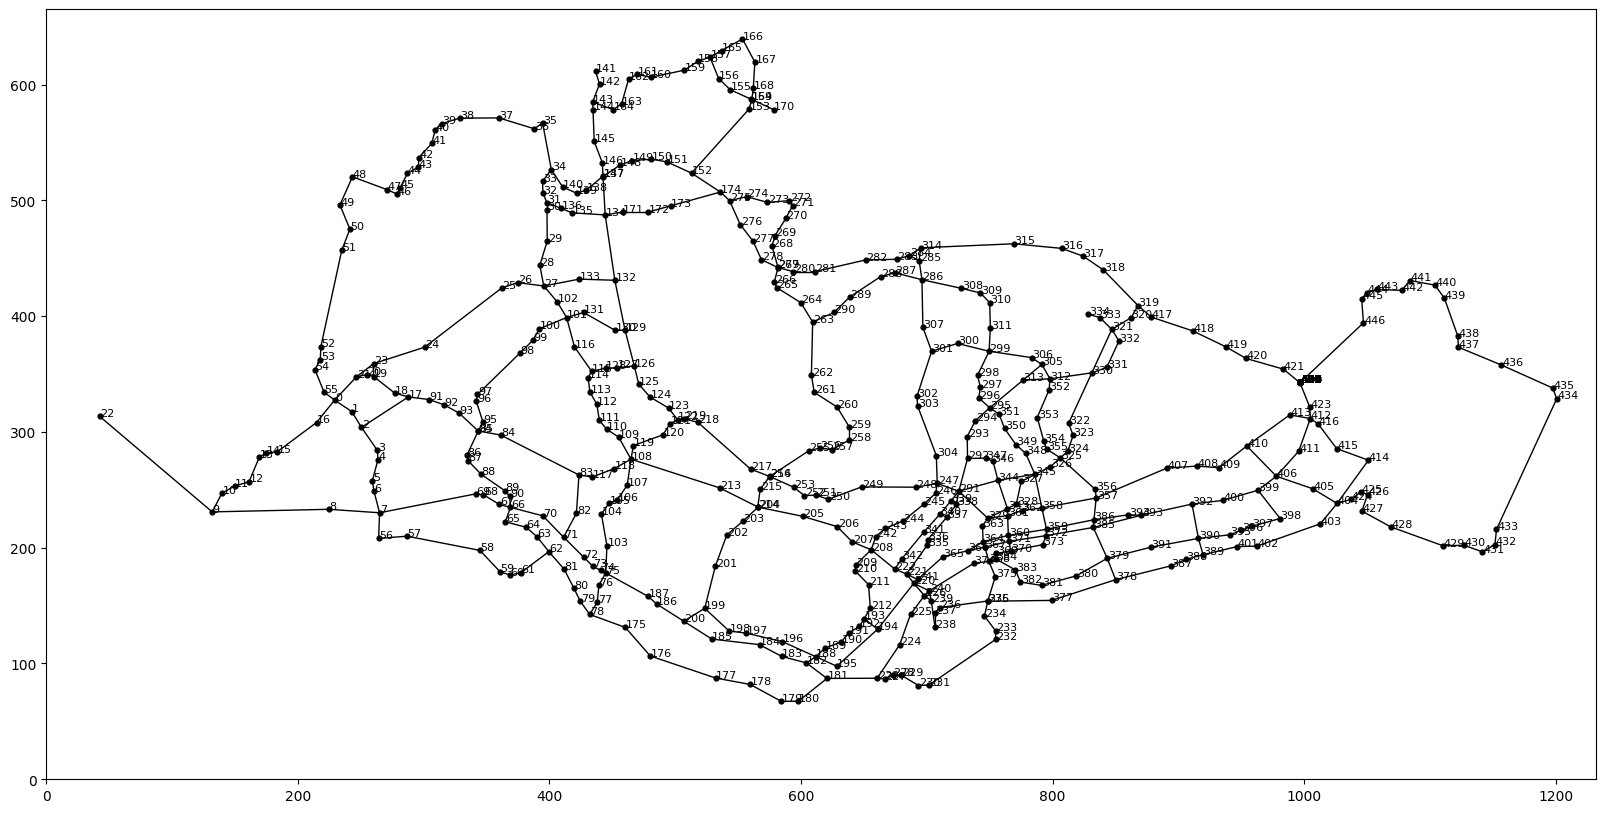

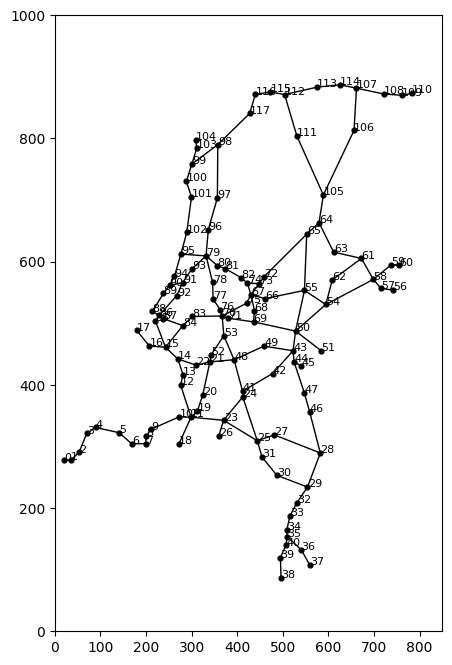

In [2]:
repr_sp = fr.Representation("./data/nodes_sp.csv", "./data/edges_sp.csv", maptype="sp")
repr_sp.plot_map(plot_nodes=True)

repr_nl = fr.Representation("./data/nodes_nl.csv", "./data/edges_nl.csv", maptype="nl")
repr_nl.plot_map(plot_nodes=True)

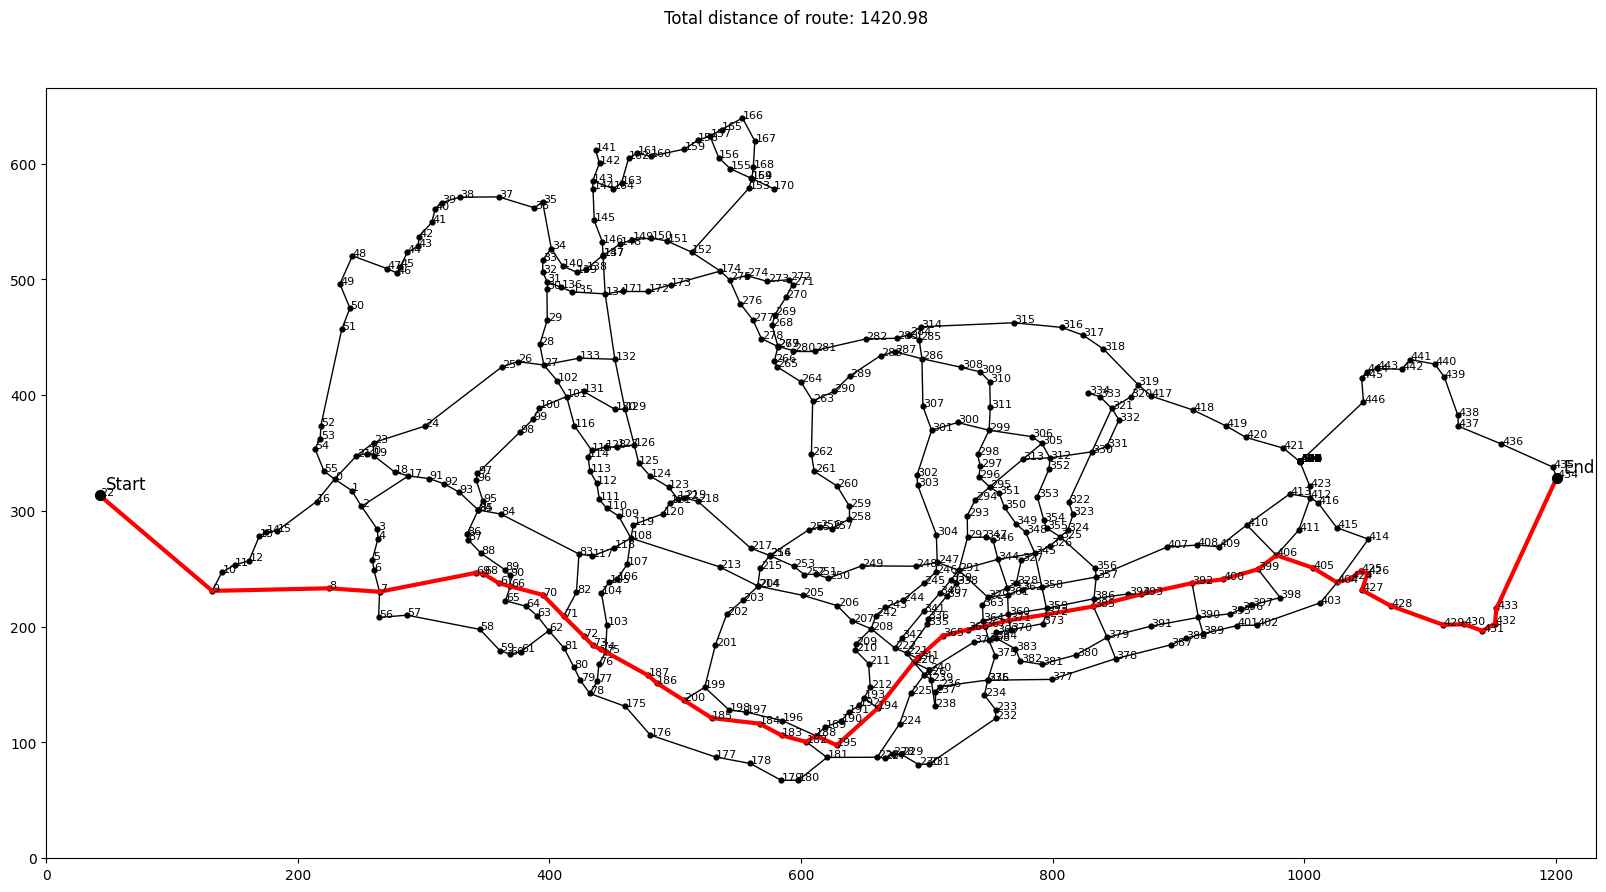

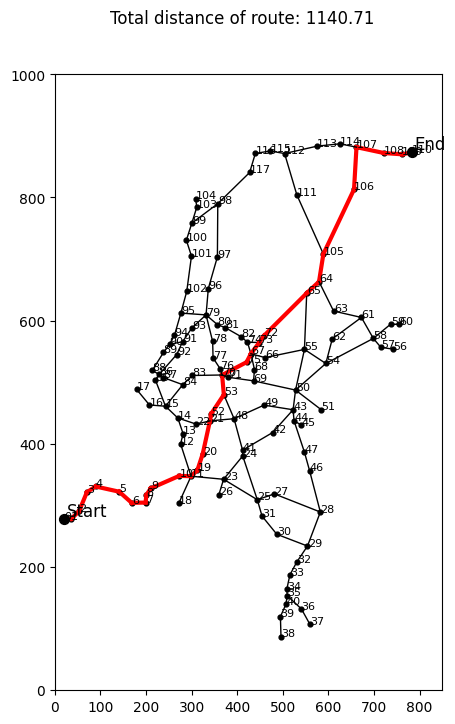

In [3]:
alg = dijkstra.DIJKSTRA(repr_sp, 22, 434)
route, cost = alg.run_algorithm(show_results=True)

alg = dijkstra.DIJKSTRA(repr_nl, 0, 110)
route, cost = alg.run_algorithm(show_results=True)

100%|██████████| 200/200 [00:06<00:00, 31.58it/s]


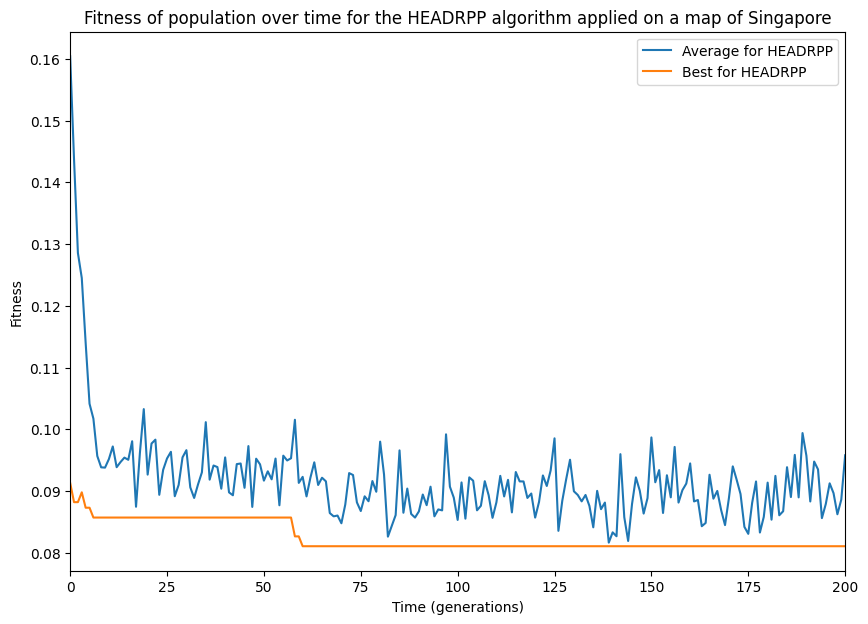

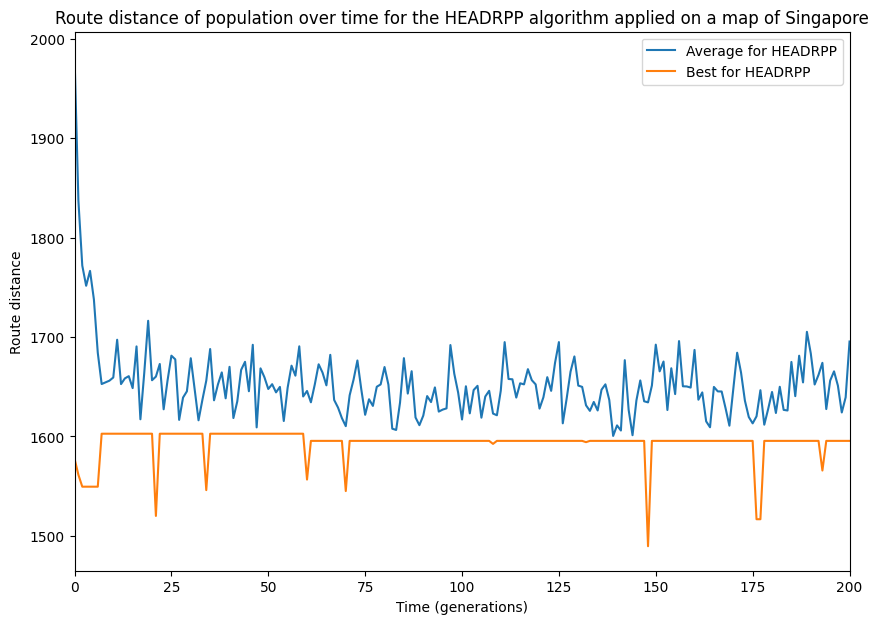

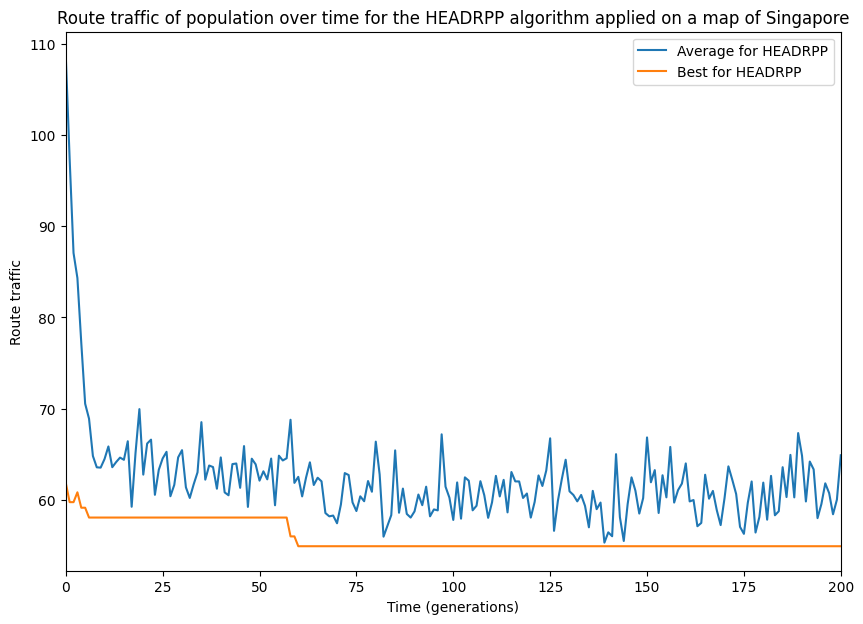

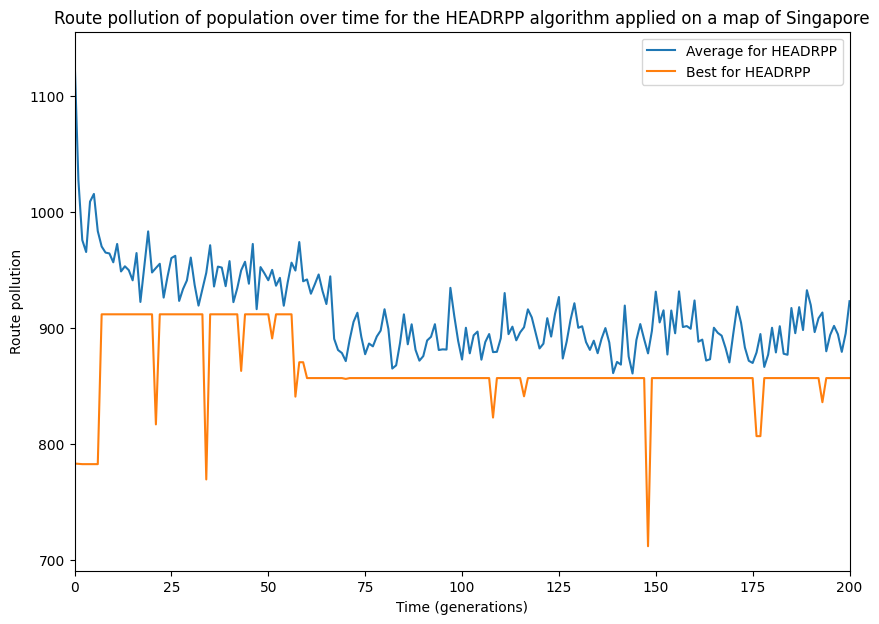

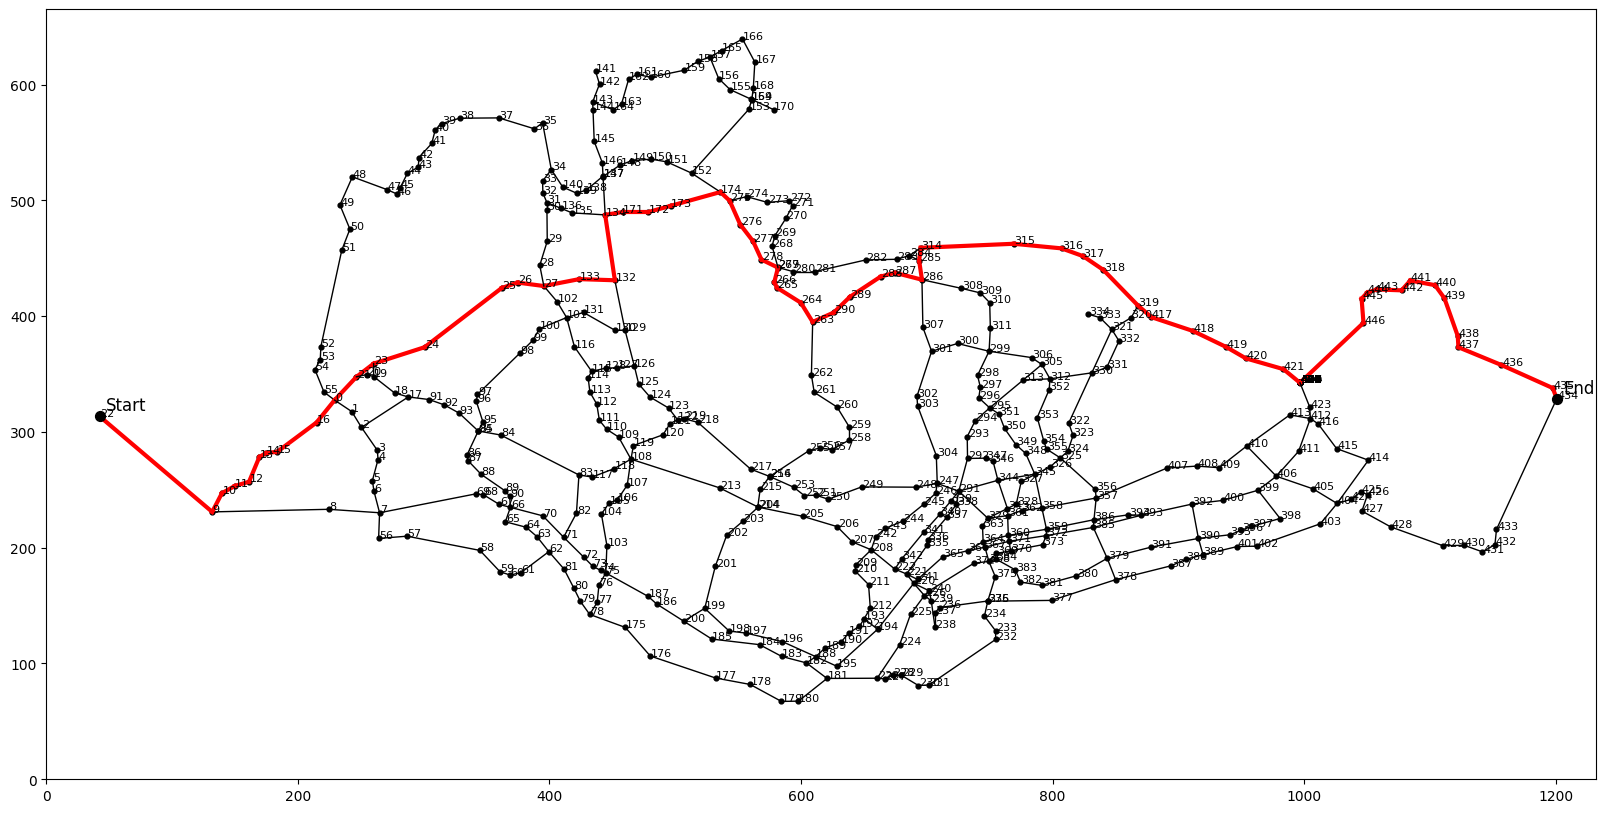

100%|██████████| 200/200 [00:00<00:00, 629.14it/s]


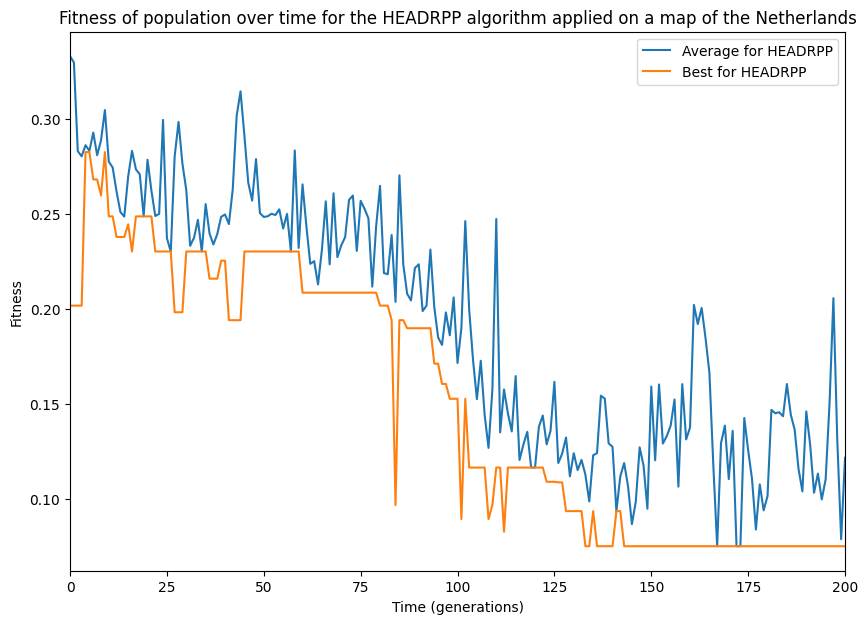

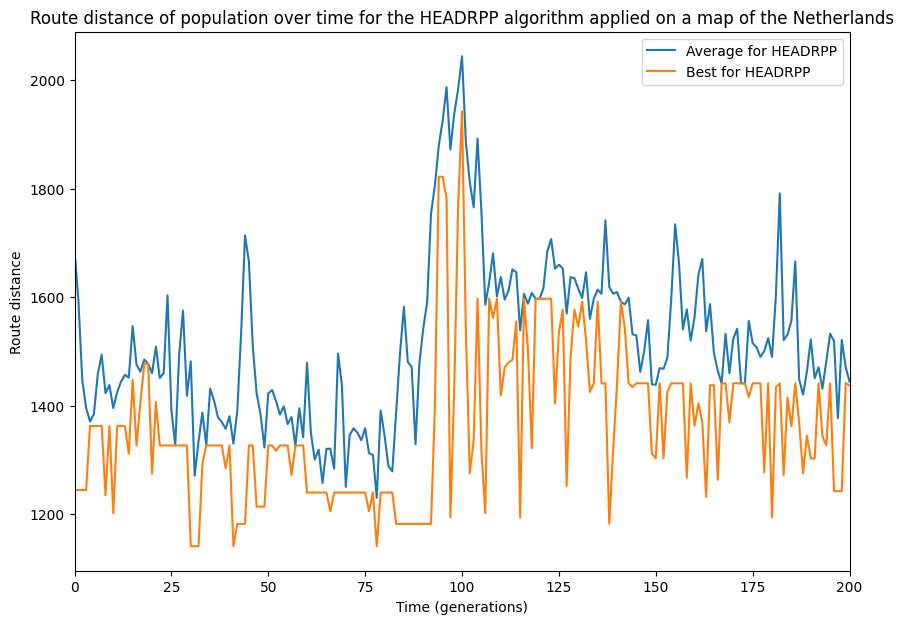

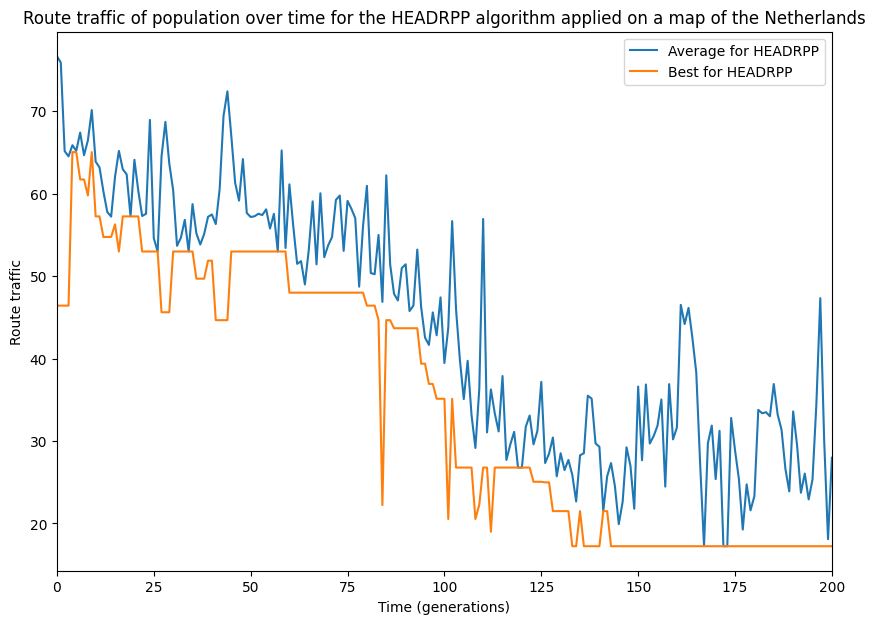

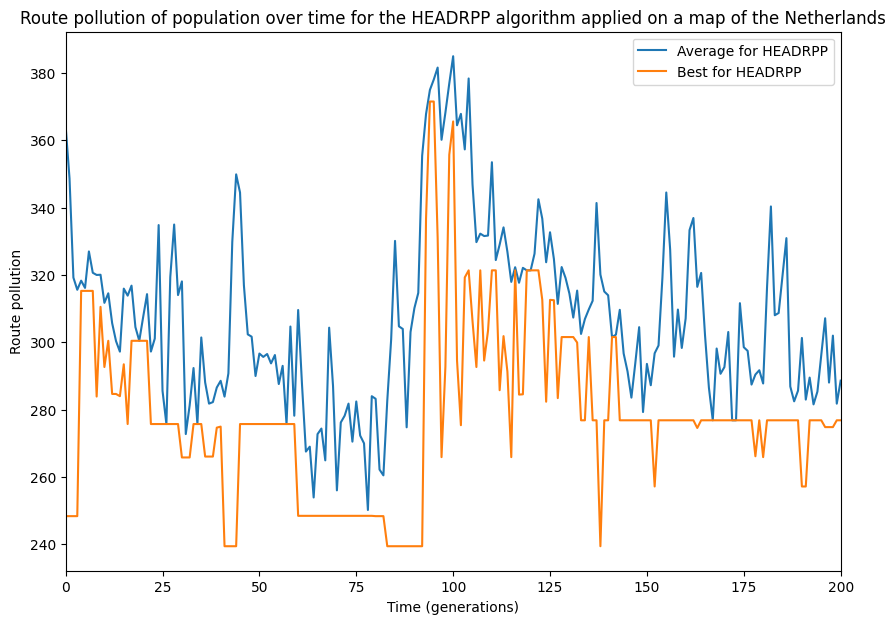

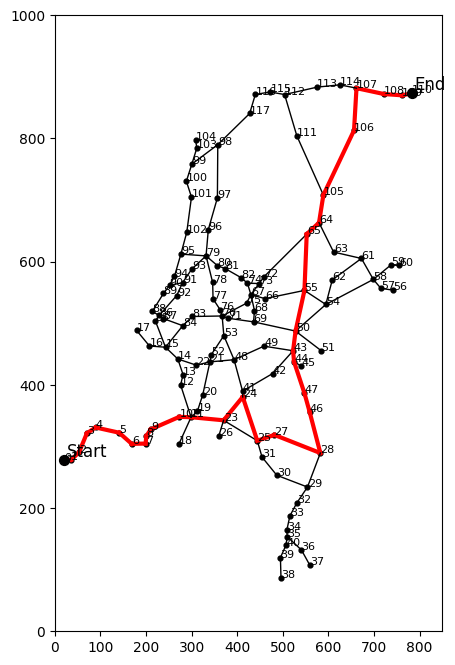

In [4]:
nr_generations = 200
weights = [0, 1, 0] # distance, traffic, pollution

pop_size_sg = 50
alg = headrpp.HEADRPP(repr_sp, nr_generations, 22, 434, pop_size_sg, weights)
results = alg.run_algorithm(show_results=True, save_name="images/singapore")
repr_sp.plot_map(results[1], plot_nodes=True)

pop_size_nl = 10
alg = headrpp.HEADRPP(repr_nl, nr_generations, 0, 110, pop_size_nl, weights)
results = alg.run_algorithm(show_results=True, save_name="images/netherlands")
repr_nl.plot_map(results[1], plot_nodes=True)

  0%|          | 1/200 [00:01<04:43,  1.42s/it]

Time fast_non_dominated_sort: 1.4128179550170898
Time crowding_distance_selection: 5.7220458984375e-06


  1%|          | 2/200 [00:02<04:24,  1.34s/it]

Time fast_non_dominated_sort: 1.2388348579406738
Time crowding_distance_selection: 0.004029989242553711


  2%|▏         | 3/200 [00:03<04:10,  1.27s/it]

Time fast_non_dominated_sort: 1.1785862445831299
Time crowding_distance_selection: 0.0052890777587890625


  2%|▏         | 4/200 [00:05<04:06,  1.26s/it]

Time fast_non_dominated_sort: 1.1440298557281494
Time crowding_distance_selection: 0.06099820137023926


  2%|▎         | 5/200 [00:06<03:57,  1.22s/it]

Time fast_non_dominated_sort: 1.1170680522918701
Time crowding_distance_selection: 4.0531158447265625e-06


  3%|▎         | 6/200 [00:07<03:57,  1.23s/it]

Time fast_non_dominated_sort: 1.1105549335479736
Time crowding_distance_selection: 0.11359691619873047


  4%|▎         | 7/200 [00:08<04:00,  1.25s/it]

Time fast_non_dominated_sort: 1.1508960723876953
Time crowding_distance_selection: 0.12825894355773926
Time fast_non_dominated_sort: 1.1053986549377441


  4%|▍         | 8/200 [00:10<04:06,  1.28s/it]

Time crowding_distance_selection: 0.22911381721496582
Time fast_non_dominated_sort: 1.0803782939910889


  4%|▍         | 9/200 [00:11<04:17,  1.35s/it]

Time crowding_distance_selection: 0.37110018730163574
Time fast_non_dominated_sort: 1.0970458984375


  5%|▌         | 10/200 [00:13<04:22,  1.38s/it]

Time crowding_distance_selection: 0.34920787811279297
Time fast_non_dominated_sort: 1.084367036819458


  6%|▌         | 11/200 [00:14<04:25,  1.40s/it]

Time crowding_distance_selection: 0.3251187801361084


  6%|▌         | 12/200 [00:15<04:14,  1.35s/it]

Time fast_non_dominated_sort: 1.0896859169006348
Time crowding_distance_selection: 0.1289207935333252


  6%|▋         | 13/200 [00:17<04:08,  1.33s/it]

Time fast_non_dominated_sort: 1.0817537307739258
Time crowding_distance_selection: 0.17386293411254883
Time fast_non_dominated_sort: 1.0311920642852783


  7%|▋         | 14/200 [00:18<04:06,  1.33s/it]

Time crowding_distance_selection: 0.2855989933013916
Time fast_non_dominated_sort: 1.035837173461914


  8%|▊         | 15/200 [00:19<04:07,  1.34s/it]

Time crowding_distance_selection: 0.3185141086578369


  8%|▊         | 16/200 [00:20<03:59,  1.30s/it]

Time fast_non_dominated_sort: 1.0413060188293457
Time crowding_distance_selection: 0.16367197036743164
Time fast_non_dominated_sort: 0.9841790199279785


  8%|▊         | 17/200 [00:22<03:56,  1.29s/it]

Time crowding_distance_selection: 0.2688171863555908
Time fast_non_dominated_sort: 0.9581849575042725


  9%|▉         | 18/200 [00:23<03:53,  1.29s/it]

Time crowding_distance_selection: 0.2945380210876465
Time fast_non_dominated_sort: 0.9583637714385986


 10%|▉         | 19/200 [00:24<03:50,  1.28s/it]

Time crowding_distance_selection: 0.27892518043518066
Time fast_non_dominated_sort: 0.9592549800872803


 10%|█         | 20/200 [00:26<03:47,  1.26s/it]

Time crowding_distance_selection: 0.25481605529785156
Time fast_non_dominated_sort: 0.9583768844604492


 10%|█         | 21/200 [00:27<03:45,  1.26s/it]

Time crowding_distance_selection: 0.28647327423095703
Time fast_non_dominated_sort: 0.9493567943572998


 11%|█         | 22/200 [00:28<03:43,  1.26s/it]

Time crowding_distance_selection: 0.2904932498931885
Time fast_non_dominated_sort: 0.9620180130004883


 12%|█▏        | 23/200 [00:29<03:42,  1.26s/it]

Time crowding_distance_selection: 0.279620885848999
Time fast_non_dominated_sort: 0.9587059020996094


 12%|█▏        | 24/200 [00:31<03:42,  1.26s/it]

Time crowding_distance_selection: 0.28829121589660645
Time fast_non_dominated_sort: 0.9450280666351318


 12%|█▎        | 25/200 [00:32<03:41,  1.26s/it]

Time crowding_distance_selection: 0.30698204040527344
Time fast_non_dominated_sort: 0.9744770526885986


 13%|█▎        | 26/200 [00:33<03:39,  1.26s/it]

Time crowding_distance_selection: 0.2538950443267822
Time fast_non_dominated_sort: 0.9511449337005615


 14%|█▎        | 27/200 [00:34<03:37,  1.26s/it]

Time crowding_distance_selection: 0.28663086891174316
Time fast_non_dominated_sort: 0.9698269367218018


 14%|█▍        | 28/200 [00:36<03:37,  1.26s/it]

Time crowding_distance_selection: 0.2807579040527344
Time fast_non_dominated_sort: 0.9560830593109131


 14%|█▍        | 29/200 [00:37<03:35,  1.26s/it]

Time crowding_distance_selection: 0.27570414543151855
Time fast_non_dominated_sort: 0.9514691829681396


 15%|█▌        | 30/200 [00:38<03:35,  1.27s/it]

Time crowding_distance_selection: 0.3205881118774414
Time fast_non_dominated_sort: 0.9542992115020752


 16%|█▌        | 31/200 [00:39<03:34,  1.27s/it]

Time crowding_distance_selection: 0.2922329902648926
Time fast_non_dominated_sort: 0.9563868045806885


 16%|█▌        | 32/200 [00:41<03:32,  1.26s/it]

Time crowding_distance_selection: 0.2862699031829834
Time fast_non_dominated_sort: 0.9528601169586182


 16%|█▋        | 33/200 [00:42<03:31,  1.26s/it]

Time crowding_distance_selection: 0.30594420433044434
Time fast_non_dominated_sort: 0.9585540294647217


 17%|█▋        | 34/200 [00:43<03:29,  1.26s/it]

Time crowding_distance_selection: 0.29435229301452637
Time fast_non_dominated_sort: 0.9364240169525146


 18%|█▊        | 35/200 [00:44<03:27,  1.26s/it]

Time crowding_distance_selection: 0.3049290180206299
Time fast_non_dominated_sort: 0.9559540748596191


 18%|█▊        | 36/200 [00:46<03:25,  1.26s/it]

Time crowding_distance_selection: 0.2793128490447998
Time fast_non_dominated_sort: 0.9536800384521484


 18%|█▊        | 37/200 [00:47<03:24,  1.25s/it]

Time crowding_distance_selection: 0.259807825088501
Time fast_non_dominated_sort: 0.9534409046173096


 19%|█▉        | 38/200 [00:48<03:23,  1.25s/it]

Time crowding_distance_selection: 0.29491591453552246
Time fast_non_dominated_sort: 0.9475240707397461


 20%|█▉        | 39/200 [00:49<03:21,  1.25s/it]

Time crowding_distance_selection: 0.29146289825439453
Time fast_non_dominated_sort: 0.9659562110900879


 20%|██        | 40/200 [00:51<03:20,  1.25s/it]

Time crowding_distance_selection: 0.26824188232421875
Time fast_non_dominated_sort: 0.9541158676147461


 20%|██        | 41/200 [00:52<03:20,  1.26s/it]

Time crowding_distance_selection: 0.307387113571167
Time fast_non_dominated_sort: 0.9684441089630127


 21%|██        | 42/200 [00:53<03:19,  1.26s/it]

Time crowding_distance_selection: 0.26682519912719727
Time fast_non_dominated_sort: 0.9640650749206543


 22%|██▏       | 43/200 [00:55<03:18,  1.27s/it]

Time crowding_distance_selection: 0.2945539951324463
Time fast_non_dominated_sort: 0.9620110988616943


 22%|██▏       | 44/200 [00:56<03:17,  1.27s/it]

Time crowding_distance_selection: 0.26691102981567383
Time fast_non_dominated_sort: 0.964667797088623


 22%|██▎       | 45/200 [00:57<03:15,  1.26s/it]

Time crowding_distance_selection: 0.2468581199645996
Time fast_non_dominated_sort: 0.9579241275787354


 23%|██▎       | 46/200 [00:58<03:13,  1.25s/it]

Time crowding_distance_selection: 0.25888586044311523
Time fast_non_dominated_sort: 0.9713683128356934


 24%|██▎       | 47/200 [00:59<03:11,  1.25s/it]

Time crowding_distance_selection: 0.26450395584106445


 24%|██▍       | 48/200 [01:01<03:07,  1.24s/it]

Time fast_non_dominated_sort: 0.9869351387023926
Time crowding_distance_selection: 0.19127678871154785


 24%|██▍       | 49/200 [01:02<03:01,  1.20s/it]

Time fast_non_dominated_sort: 0.9571571350097656
Time crowding_distance_selection: 0.14865684509277344


 25%|██▌       | 50/200 [01:03<02:55,  1.17s/it]

Time fast_non_dominated_sort: 0.9844732284545898
Time crowding_distance_selection: 0.07908082008361816
Time fast_non_dominated_sort: 1.0154953002929688


 26%|██▌       | 51/200 [01:04<02:58,  1.20s/it]

Time crowding_distance_selection: 0.2319350242614746
Time fast_non_dominated_sort: 1.0146539211273193


 26%|██▌       | 52/200 [01:06<03:04,  1.24s/it]

Time crowding_distance_selection: 0.3256809711456299


 26%|██▋       | 53/200 [01:07<02:59,  1.22s/it]

Time fast_non_dominated_sort: 1.021850824356079
Time crowding_distance_selection: 0.10419011116027832
Time fast_non_dominated_sort: 0.9245548248291016


 27%|██▋       | 54/200 [01:08<02:58,  1.22s/it]

Time crowding_distance_selection: 0.2962796688079834
Time fast_non_dominated_sort: 0.9785988330841064


 28%|██▊       | 55/200 [01:09<02:58,  1.23s/it]

Time crowding_distance_selection: 0.256680965423584
Time fast_non_dominated_sort: 0.94663405418396


 28%|██▊       | 56/200 [01:10<02:58,  1.24s/it]

Time crowding_distance_selection: 0.2765839099884033
Time fast_non_dominated_sort: 0.9416477680206299


 28%|██▊       | 57/200 [01:12<02:56,  1.24s/it]

Time crowding_distance_selection: 0.27437329292297363
Time fast_non_dominated_sort: 0.9423098564147949


 29%|██▉       | 58/200 [01:13<02:53,  1.22s/it]

Time crowding_distance_selection: 0.2184128761291504


 30%|██▉       | 59/200 [01:14<02:48,  1.20s/it]

Time fast_non_dominated_sort: 0.9258322715759277
Time crowding_distance_selection: 0.20302581787109375


 30%|███       | 60/200 [01:15<02:44,  1.17s/it]

Time fast_non_dominated_sort: 0.9576771259307861
Time crowding_distance_selection: 0.13701295852661133


 30%|███       | 61/200 [01:16<02:38,  1.14s/it]

Time fast_non_dominated_sort: 0.9582998752593994
Time crowding_distance_selection: 0.0746757984161377


 31%|███       | 62/200 [01:17<02:39,  1.16s/it]

Time fast_non_dominated_sort: 0.9797508716583252
Time crowding_distance_selection: 0.20427608489990234
Time fast_non_dominated_sort: 0.9630153179168701


 32%|███▏      | 63/200 [01:19<02:42,  1.18s/it]

Time crowding_distance_selection: 0.26653599739074707
Time fast_non_dominated_sort: 0.9662609100341797


 32%|███▏      | 64/200 [01:20<02:44,  1.21s/it]

Time crowding_distance_selection: 0.27395009994506836
Time fast_non_dominated_sort: 0.9441897869110107


 32%|███▎      | 65/200 [01:21<02:45,  1.23s/it]

Time crowding_distance_selection: 0.3058130741119385
Time fast_non_dominated_sort: 0.9498231410980225


 33%|███▎      | 66/200 [01:22<02:47,  1.25s/it]

Time crowding_distance_selection: 0.33458685874938965
Time fast_non_dominated_sort: 0.9594151973724365


 34%|███▎      | 67/200 [01:24<02:46,  1.25s/it]

Time crowding_distance_selection: 0.28333210945129395
Time fast_non_dominated_sort: 0.9535112380981445


 34%|███▍      | 68/200 [01:25<02:45,  1.26s/it]

Time crowding_distance_selection: 0.30512309074401855
Time fast_non_dominated_sort: 0.9689881801605225


 34%|███▍      | 69/200 [01:26<02:45,  1.26s/it]

Time crowding_distance_selection: 0.29947876930236816
Time fast_non_dominated_sort: 0.9757311344146729


 35%|███▌      | 70/200 [01:27<02:43,  1.26s/it]

Time crowding_distance_selection: 0.24236297607421875
Time fast_non_dominated_sort: 0.9641473293304443


 36%|███▌      | 71/200 [01:29<02:43,  1.27s/it]

Time crowding_distance_selection: 0.29404687881469727
Time fast_non_dominated_sort: 0.9686830043792725


 36%|███▌      | 72/200 [01:30<02:42,  1.27s/it]

Time crowding_distance_selection: 0.26218199729919434


 36%|███▋      | 73/200 [01:31<02:35,  1.23s/it]

Time fast_non_dominated_sort: 0.9455139636993408
Time crowding_distance_selection: 0.16565489768981934


 37%|███▋      | 74/200 [01:32<02:28,  1.18s/it]

Time fast_non_dominated_sort: 0.958078145980835
Time crowding_distance_selection: 0.09554600715637207
Time fast_non_dominated_sort: 1.0227560997009277


 38%|███▊      | 75/200 [01:34<02:32,  1.22s/it]

Time crowding_distance_selection: 0.24199914932250977
Time fast_non_dominated_sort: 0.9826939105987549


 38%|███▊      | 76/200 [01:35<02:35,  1.25s/it]

Time crowding_distance_selection: 0.3332221508026123
Time fast_non_dominated_sort: 1.0092499256134033


 38%|███▊      | 77/200 [01:36<02:35,  1.27s/it]

Time crowding_distance_selection: 0.2728269100189209
Time fast_non_dominated_sort: 1.0211999416351318


 39%|███▉      | 78/200 [01:38<02:38,  1.30s/it]

Time crowding_distance_selection: 0.3094050884246826
Time fast_non_dominated_sort: 1.0024299621582031


 40%|███▉      | 79/200 [01:39<02:38,  1.31s/it]

Time crowding_distance_selection: 0.31163883209228516
Time fast_non_dominated_sort: 0.9877557754516602


 40%|████      | 80/200 [01:40<02:36,  1.31s/it]

Time crowding_distance_selection: 0.3001108169555664
Time fast_non_dominated_sort: 1.0093131065368652


 40%|████      | 81/200 [01:42<02:36,  1.31s/it]

Time crowding_distance_selection: 0.31281018257141113
Time fast_non_dominated_sort: 1.025618076324463


 41%|████      | 82/200 [01:43<02:37,  1.33s/it]

Time crowding_distance_selection: 0.33565688133239746
Time fast_non_dominated_sort: 1.0141677856445312


 42%|████▏     | 83/200 [01:44<02:37,  1.35s/it]

Time crowding_distance_selection: 0.3222200870513916
Time fast_non_dominated_sort: 1.003493070602417


 42%|████▏     | 84/200 [01:46<02:35,  1.34s/it]

Time crowding_distance_selection: 0.29556703567504883
Time fast_non_dominated_sort: 0.9897089004516602


 42%|████▎     | 85/200 [01:47<02:33,  1.33s/it]

Time crowding_distance_selection: 0.32231903076171875
Time fast_non_dominated_sort: 0.9994950294494629


 43%|████▎     | 86/200 [01:48<02:32,  1.34s/it]

Time crowding_distance_selection: 0.32346606254577637
Time fast_non_dominated_sort: 1.0035138130187988


 44%|████▎     | 87/200 [01:50<02:30,  1.33s/it]

Time crowding_distance_selection: 0.29300618171691895
Time fast_non_dominated_sort: 1.0064771175384521


 44%|████▍     | 88/200 [01:51<02:29,  1.34s/it]

Time crowding_distance_selection: 0.32019495964050293
Time fast_non_dominated_sort: 1.0069680213928223


 44%|████▍     | 89/200 [01:52<02:28,  1.33s/it]

Time crowding_distance_selection: 0.318267822265625
Time fast_non_dominated_sort: 0.988530158996582


 45%|████▌     | 90/200 [01:54<02:26,  1.33s/it]

Time crowding_distance_selection: 0.33614683151245117
Time fast_non_dominated_sort: 1.0064997673034668


 46%|████▌     | 91/200 [01:55<02:26,  1.34s/it]

Time crowding_distance_selection: 0.33820605278015137
Time fast_non_dominated_sort: 1.0208230018615723


 46%|████▌     | 92/200 [01:56<02:25,  1.34s/it]

Time crowding_distance_selection: 0.3202359676361084
Time fast_non_dominated_sort: 1.0012600421905518


 46%|████▋     | 93/200 [01:58<02:23,  1.34s/it]

Time crowding_distance_selection: 0.30933189392089844
Time fast_non_dominated_sort: 1.0080599784851074


 47%|████▋     | 94/200 [01:59<02:22,  1.34s/it]

Time crowding_distance_selection: 0.3019239902496338
Time fast_non_dominated_sort: 1.0321331024169922


 48%|████▊     | 95/200 [02:00<02:21,  1.35s/it]

Time crowding_distance_selection: 0.2914731502532959
Time fast_non_dominated_sort: 1.0084948539733887


 48%|████▊     | 96/200 [02:02<02:20,  1.35s/it]

Time crowding_distance_selection: 0.3115730285644531
Time fast_non_dominated_sort: 1.0085649490356445


 48%|████▊     | 97/200 [02:03<02:17,  1.34s/it]

Time crowding_distance_selection: 0.27997493743896484
Time fast_non_dominated_sort: 1.0135650634765625


 49%|████▉     | 98/200 [02:04<02:16,  1.34s/it]

Time crowding_distance_selection: 0.28840208053588867
Time fast_non_dominated_sort: 1.044727087020874


 50%|████▉     | 99/200 [02:06<02:16,  1.35s/it]

Time crowding_distance_selection: 0.29923510551452637
Time fast_non_dominated_sort: 1.0116500854492188


 50%|█████     | 100/200 [02:07<02:13,  1.34s/it]

Time crowding_distance_selection: 0.27318882942199707
Time fast_non_dominated_sort: 1.0080420970916748


 50%|█████     | 101/200 [02:08<02:12,  1.34s/it]

Time crowding_distance_selection: 0.316303014755249
Time fast_non_dominated_sort: 1.002413034439087


 51%|█████     | 102/200 [02:10<02:11,  1.34s/it]

Time crowding_distance_selection: 0.3258628845214844
Time fast_non_dominated_sort: 1.0033020973205566


 52%|█████▏    | 103/200 [02:11<02:10,  1.34s/it]

Time crowding_distance_selection: 0.3308899402618408
Time fast_non_dominated_sort: 1.0173628330230713


 52%|█████▏    | 104/200 [02:12<02:09,  1.35s/it]

Time crowding_distance_selection: 0.28130102157592773
Time fast_non_dominated_sort: 1.009674072265625


 52%|█████▎    | 105/200 [02:14<02:07,  1.35s/it]

Time crowding_distance_selection: 0.3325791358947754
Time fast_non_dominated_sort: 1.0016820430755615


 53%|█████▎    | 106/200 [02:15<02:06,  1.34s/it]

Time crowding_distance_selection: 0.32482028007507324
Time fast_non_dominated_sort: 1.0133922100067139


 54%|█████▎    | 107/200 [02:16<02:05,  1.35s/it]

Time crowding_distance_selection: 0.3250439167022705
Time fast_non_dominated_sort: 1.0132572650909424


 54%|█████▍    | 108/200 [02:18<02:04,  1.35s/it]

Time crowding_distance_selection: 0.34034299850463867
Time fast_non_dominated_sort: 1.0131237506866455


 55%|█████▍    | 109/200 [02:19<02:03,  1.35s/it]

Time crowding_distance_selection: 0.3218650817871094
Time fast_non_dominated_sort: 0.9925947189331055


 55%|█████▌    | 110/200 [02:21<02:01,  1.35s/it]

Time crowding_distance_selection: 0.3382699489593506
Time fast_non_dominated_sort: 1.0219440460205078


 56%|█████▌    | 111/200 [02:22<02:01,  1.36s/it]

Time crowding_distance_selection: 0.3276669979095459
Time fast_non_dominated_sort: 0.9971120357513428


 56%|█████▌    | 112/200 [02:23<01:59,  1.35s/it]

Time crowding_distance_selection: 0.3372969627380371
Time fast_non_dominated_sort: 1.013286828994751


 56%|█████▋    | 113/200 [02:25<01:57,  1.35s/it]

Time crowding_distance_selection: 0.3073699474334717
Time fast_non_dominated_sort: 1.0490751266479492


 57%|█████▋    | 114/200 [02:26<01:57,  1.36s/it]

Time crowding_distance_selection: 0.31604599952697754
Time fast_non_dominated_sort: 1.0132007598876953


 57%|█████▊    | 115/200 [02:27<01:55,  1.36s/it]

Time crowding_distance_selection: 0.33179330825805664
Time fast_non_dominated_sort: 0.9972248077392578


 58%|█████▊    | 116/200 [02:29<01:54,  1.37s/it]

Time crowding_distance_selection: 0.34957408905029297
Time fast_non_dominated_sort: 1.0082333087921143


 58%|█████▊    | 117/200 [02:30<01:52,  1.36s/it]

Time crowding_distance_selection: 0.30765628814697266
Time fast_non_dominated_sort: 1.0160729885101318


 59%|█████▉    | 118/200 [02:31<01:50,  1.35s/it]

Time crowding_distance_selection: 0.303347110748291
Time fast_non_dominated_sort: 1.0088989734649658


 60%|█████▉    | 119/200 [02:33<01:49,  1.35s/it]

Time crowding_distance_selection: 0.3160569667816162
Time fast_non_dominated_sort: 1.0124890804290771


 60%|██████    | 120/200 [02:34<01:47,  1.34s/it]

Time crowding_distance_selection: 0.30324292182922363
Time fast_non_dominated_sort: 1.0186941623687744


 60%|██████    | 121/200 [02:35<01:46,  1.35s/it]

Time crowding_distance_selection: 0.3362150192260742
Time fast_non_dominated_sort: 1.0017690658569336


 61%|██████    | 122/200 [02:37<01:45,  1.35s/it]

Time crowding_distance_selection: 0.3249931335449219
Time fast_non_dominated_sort: 1.0161490440368652


 62%|██████▏   | 123/200 [02:38<01:43,  1.35s/it]

Time crowding_distance_selection: 0.31688380241394043
Time fast_non_dominated_sort: 1.0124239921569824


 62%|██████▏   | 124/200 [02:39<01:42,  1.35s/it]

Time crowding_distance_selection: 0.2952899932861328
Time fast_non_dominated_sort: 0.9883618354797363


 62%|██████▎   | 125/200 [02:41<01:41,  1.35s/it]

Time crowding_distance_selection: 0.3368988037109375
Time fast_non_dominated_sort: 1.0232210159301758


 63%|██████▎   | 126/200 [02:42<01:39,  1.35s/it]

Time crowding_distance_selection: 0.28179097175598145
Time fast_non_dominated_sort: 1.0204510688781738


 64%|██████▎   | 127/200 [02:44<01:38,  1.34s/it]

Time crowding_distance_selection: 0.3047192096710205
Time fast_non_dominated_sort: 1.044800043106079


 64%|██████▍   | 128/200 [02:45<01:36,  1.35s/it]

Time crowding_distance_selection: 0.2858729362487793
Time fast_non_dominated_sort: 1.0376310348510742


 64%|██████▍   | 129/200 [02:46<01:36,  1.35s/it]

Time crowding_distance_selection: 0.30394983291625977
Time fast_non_dominated_sort: 1.0028119087219238


 65%|██████▌   | 130/200 [02:48<01:34,  1.35s/it]

Time crowding_distance_selection: 0.31193113327026367
Time fast_non_dominated_sort: 1.0220410823822021


 66%|██████▌   | 131/200 [02:49<01:32,  1.35s/it]

Time crowding_distance_selection: 0.282412052154541
Time fast_non_dominated_sort: 1.0276188850402832


 66%|██████▌   | 132/200 [02:50<01:31,  1.34s/it]

Time crowding_distance_selection: 0.2793891429901123
Time fast_non_dominated_sort: 1.0131831169128418


 66%|██████▋   | 133/200 [02:52<01:30,  1.35s/it]

Time crowding_distance_selection: 0.32602477073669434
Time fast_non_dominated_sort: 1.0127511024475098


 67%|██████▋   | 134/200 [02:53<01:29,  1.36s/it]

Time crowding_distance_selection: 0.33877086639404297
Time fast_non_dominated_sort: 1.0302338600158691


 68%|██████▊   | 135/200 [02:54<01:29,  1.37s/it]

Time crowding_distance_selection: 0.3393089771270752
Time fast_non_dominated_sort: 0.9874138832092285


 68%|██████▊   | 136/200 [02:56<01:27,  1.36s/it]

Time crowding_distance_selection: 0.3381311893463135
Time fast_non_dominated_sort: 1.0463428497314453


 68%|██████▊   | 137/200 [02:57<01:26,  1.38s/it]

Time crowding_distance_selection: 0.33252406120300293
Time fast_non_dominated_sort: 1.0359439849853516


 69%|██████▉   | 138/200 [02:59<01:25,  1.38s/it]

Time crowding_distance_selection: 0.3296990394592285
Time fast_non_dominated_sort: 1.0331370830535889


 70%|██████▉   | 139/200 [03:00<01:24,  1.38s/it]

Time crowding_distance_selection: 0.2805466651916504
Time fast_non_dominated_sort: 1.0140509605407715


 70%|███████   | 140/200 [03:01<01:21,  1.37s/it]

Time crowding_distance_selection: 0.3153982162475586
Time fast_non_dominated_sort: 1.0211029052734375


 70%|███████   | 141/200 [03:03<01:20,  1.37s/it]

Time crowding_distance_selection: 0.310621976852417
Time fast_non_dominated_sort: 1.0172841548919678


 71%|███████   | 142/200 [03:04<01:19,  1.36s/it]

Time crowding_distance_selection: 0.319674015045166
Time fast_non_dominated_sort: 1.0292069911956787


 72%|███████▏  | 143/200 [03:05<01:17,  1.37s/it]

Time crowding_distance_selection: 0.3295729160308838
Time fast_non_dominated_sort: 0.9940948486328125


 72%|███████▏  | 144/200 [03:07<01:16,  1.36s/it]

Time crowding_distance_selection: 0.3322570323944092
Time fast_non_dominated_sort: 1.0290541648864746


 72%|███████▎  | 145/200 [03:08<01:14,  1.36s/it]

Time crowding_distance_selection: 0.3135030269622803
Time fast_non_dominated_sort: 1.0163688659667969


 73%|███████▎  | 146/200 [03:09<01:12,  1.35s/it]

Time crowding_distance_selection: 0.29683375358581543
Time fast_non_dominated_sort: 1.0272159576416016


 74%|███████▎  | 147/200 [03:11<01:11,  1.35s/it]

Time crowding_distance_selection: 0.3154869079589844
Time fast_non_dominated_sort: 0.9884440898895264


 74%|███████▍  | 148/200 [03:12<01:10,  1.35s/it]

Time crowding_distance_selection: 0.3386507034301758
Time fast_non_dominated_sort: 1.014815092086792


 74%|███████▍  | 149/200 [03:13<01:08,  1.35s/it]

Time crowding_distance_selection: 0.30740785598754883
Time fast_non_dominated_sort: 0.9956321716308594


 75%|███████▌  | 150/200 [03:15<01:07,  1.34s/it]

Time crowding_distance_selection: 0.3385050296783447
Time fast_non_dominated_sort: 1.00307297706604


 76%|███████▌  | 151/200 [03:16<01:05,  1.33s/it]

Time crowding_distance_selection: 0.29059481620788574
Time fast_non_dominated_sort: 1.0015223026275635


 76%|███████▌  | 152/200 [03:17<01:04,  1.34s/it]

Time crowding_distance_selection: 0.31331491470336914
Time fast_non_dominated_sort: 1.0404491424560547


 76%|███████▋  | 153/200 [03:19<01:03,  1.35s/it]

Time crowding_distance_selection: 0.2717461585998535
Time fast_non_dominated_sort: 1.0288619995117188


 77%|███████▋  | 154/200 [03:20<01:01,  1.34s/it]

Time crowding_distance_selection: 0.251568078994751
Time fast_non_dominated_sort: 1.0120089054107666


 78%|███████▊  | 155/200 [03:22<01:00,  1.35s/it]

Time crowding_distance_selection: 0.32999396324157715
Time fast_non_dominated_sort: 1.0084569454193115


 78%|███████▊  | 156/200 [03:23<00:59,  1.34s/it]

Time crowding_distance_selection: 0.30823707580566406
Time fast_non_dominated_sort: 1.0092642307281494


 78%|███████▊  | 157/200 [03:24<00:57,  1.34s/it]

Time crowding_distance_selection: 0.31018495559692383
Time fast_non_dominated_sort: 1.017995834350586


 79%|███████▉  | 158/200 [03:26<00:56,  1.35s/it]

Time crowding_distance_selection: 0.32108330726623535
Time fast_non_dominated_sort: 0.9922270774841309


 80%|███████▉  | 159/200 [03:27<00:54,  1.34s/it]

Time crowding_distance_selection: 0.3033008575439453
Time fast_non_dominated_sort: 0.9936299324035645


 80%|████████  | 160/200 [03:28<00:53,  1.33s/it]

Time crowding_distance_selection: 0.3018670082092285
Time fast_non_dominated_sort: 1.0105462074279785


 80%|████████  | 161/200 [03:29<00:52,  1.33s/it]

Time crowding_distance_selection: 0.30960702896118164
Time fast_non_dominated_sort: 1.0288729667663574


 81%|████████  | 162/200 [03:31<00:50,  1.34s/it]

Time crowding_distance_selection: 0.2964308261871338
Time fast_non_dominated_sort: 1.0001001358032227


 82%|████████▏ | 163/200 [03:32<00:49,  1.34s/it]

Time crowding_distance_selection: 0.3342280387878418
Time fast_non_dominated_sort: 0.9965991973876953


 82%|████████▏ | 164/200 [03:33<00:47,  1.33s/it]

Time crowding_distance_selection: 0.29232096672058105
Time fast_non_dominated_sort: 1.0079050064086914


 82%|████████▎ | 165/200 [03:35<00:46,  1.33s/it]

Time crowding_distance_selection: 0.2948000431060791
Time fast_non_dominated_sort: 1.0053598880767822


 83%|████████▎ | 166/200 [03:36<00:45,  1.34s/it]

Time crowding_distance_selection: 0.32448911666870117
Time fast_non_dominated_sort: 1.0097970962524414


 84%|████████▎ | 167/200 [03:38<00:44,  1.34s/it]

Time crowding_distance_selection: 0.3085949420928955
Time fast_non_dominated_sort: 0.9988911151885986


 84%|████████▍ | 168/200 [03:39<00:42,  1.34s/it]

Time crowding_distance_selection: 0.313060998916626
Time fast_non_dominated_sort: 0.9831070899963379


 84%|████████▍ | 169/200 [03:40<00:41,  1.33s/it]

Time crowding_distance_selection: 0.3259389400482178
Time fast_non_dominated_sort: 1.0119140148162842


 85%|████████▌ | 170/200 [03:42<00:40,  1.34s/it]

Time crowding_distance_selection: 0.337249755859375
Time fast_non_dominated_sort: 1.0022857189178467


 86%|████████▌ | 171/200 [03:43<00:38,  1.34s/it]

Time crowding_distance_selection: 0.3327159881591797
Time fast_non_dominated_sort: 1.000087022781372


 86%|████████▌ | 172/200 [03:44<00:37,  1.33s/it]

Time crowding_distance_selection: 0.29000401496887207
Time fast_non_dominated_sort: 0.9881229400634766


 86%|████████▋ | 173/200 [03:46<00:35,  1.33s/it]

Time crowding_distance_selection: 0.31485676765441895
Time fast_non_dominated_sort: 1.0214447975158691


 87%|████████▋ | 174/200 [03:47<00:34,  1.34s/it]

Time crowding_distance_selection: 0.3182811737060547
Time fast_non_dominated_sort: 1.0100347995758057


 88%|████████▊ | 175/200 [03:48<00:33,  1.35s/it]

Time crowding_distance_selection: 0.3158400058746338
Time fast_non_dominated_sort: 0.9992010593414307


 88%|████████▊ | 176/200 [03:50<00:32,  1.34s/it]

Time crowding_distance_selection: 0.2917518615722656
Time fast_non_dominated_sort: 0.9995923042297363


 88%|████████▊ | 177/200 [03:51<00:30,  1.34s/it]

Time crowding_distance_selection: 0.33519697189331055
Time fast_non_dominated_sort: 1.0090200901031494


 89%|████████▉ | 178/200 [03:52<00:29,  1.35s/it]

Time crowding_distance_selection: 0.3294239044189453
Time fast_non_dominated_sort: 1.0645530223846436


 90%|████████▉ | 179/200 [03:54<00:28,  1.36s/it]

Time crowding_distance_selection: 0.2905709743499756
Time fast_non_dominated_sort: 1.0003747940063477


 90%|█████████ | 180/200 [03:55<00:27,  1.36s/it]

Time crowding_distance_selection: 0.3454439640045166
Time fast_non_dominated_sort: 0.9958579540252686


 90%|█████████ | 181/200 [03:56<00:25,  1.36s/it]

Time crowding_distance_selection: 0.34918880462646484
Time fast_non_dominated_sort: 1.0150227546691895


 91%|█████████ | 182/200 [03:58<00:24,  1.35s/it]

Time crowding_distance_selection: 0.2875049114227295
Time fast_non_dominated_sort: 1.0114779472351074


 92%|█████████▏| 183/200 [03:59<00:22,  1.34s/it]

Time crowding_distance_selection: 0.2710909843444824
Time fast_non_dominated_sort: 0.9909951686859131


 92%|█████████▏| 184/200 [04:00<00:21,  1.34s/it]

Time crowding_distance_selection: 0.342120885848999
Time fast_non_dominated_sort: 1.0151257514953613


 92%|█████████▎| 185/200 [04:02<00:20,  1.34s/it]

Time crowding_distance_selection: 0.29939699172973633
Time fast_non_dominated_sort: 1.0141620635986328


 93%|█████████▎| 186/200 [04:03<00:18,  1.35s/it]

Time crowding_distance_selection: 0.3225572109222412
Time fast_non_dominated_sort: 1.016235113143921


 94%|█████████▎| 187/200 [04:04<00:17,  1.35s/it]

Time crowding_distance_selection: 0.30756402015686035
Time fast_non_dominated_sort: 1.024921178817749


 94%|█████████▍| 188/200 [04:06<00:16,  1.36s/it]

Time crowding_distance_selection: 0.3268611431121826
Time fast_non_dominated_sort: 1.0038390159606934


 94%|█████████▍| 189/200 [04:07<00:14,  1.34s/it]

Time crowding_distance_selection: 0.28579092025756836
Time fast_non_dominated_sort: 0.9927737712860107


 95%|█████████▌| 190/200 [04:08<00:13,  1.35s/it]

Time crowding_distance_selection: 0.3374919891357422
Time fast_non_dominated_sort: 0.9981400966644287


 96%|█████████▌| 191/200 [04:10<00:12,  1.34s/it]

Time crowding_distance_selection: 0.3053710460662842
Time fast_non_dominated_sort: 1.0000247955322266


 96%|█████████▌| 192/200 [04:11<00:10,  1.34s/it]

Time crowding_distance_selection: 0.31878113746643066
Time fast_non_dominated_sort: 1.0236070156097412


 96%|█████████▋| 193/200 [04:13<00:09,  1.35s/it]

Time crowding_distance_selection: 0.33434486389160156
Time fast_non_dominated_sort: 1.050752878189087


 97%|█████████▋| 194/200 [04:14<00:08,  1.35s/it]

Time crowding_distance_selection: 0.28496408462524414
Time fast_non_dominated_sort: 1.0113139152526855


 98%|█████████▊| 195/200 [04:15<00:06,  1.35s/it]

Time crowding_distance_selection: 0.3090190887451172
Time fast_non_dominated_sort: 0.9945089817047119


 98%|█████████▊| 196/200 [04:17<00:05,  1.35s/it]

Time crowding_distance_selection: 0.34401988983154297
Time fast_non_dominated_sort: 1.0274059772491455


 98%|█████████▊| 197/200 [04:18<00:04,  1.35s/it]

Time crowding_distance_selection: 0.2980217933654785
Time fast_non_dominated_sort: 1.043956995010376


 99%|█████████▉| 198/200 [04:19<00:02,  1.35s/it]

Time crowding_distance_selection: 0.29248595237731934
Time fast_non_dominated_sort: 1.0278480052947998


100%|█████████▉| 199/200 [04:21<00:01,  1.36s/it]

Time crowding_distance_selection: 0.3343348503112793
Time fast_non_dominated_sort: 1.0220680236816406


100%|██████████| 200/200 [04:22<00:00,  1.31s/it]

Time crowding_distance_selection: 0.3082442283630371


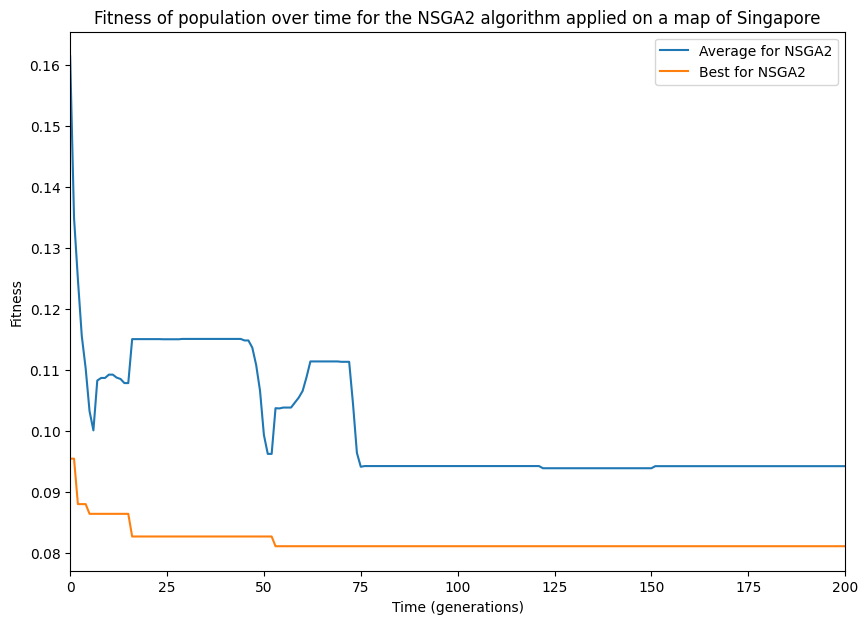

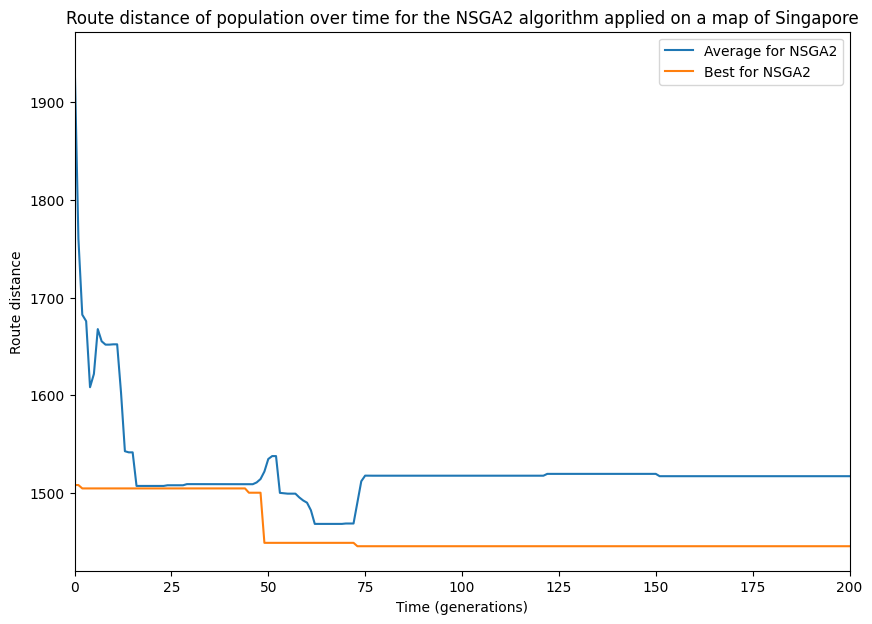

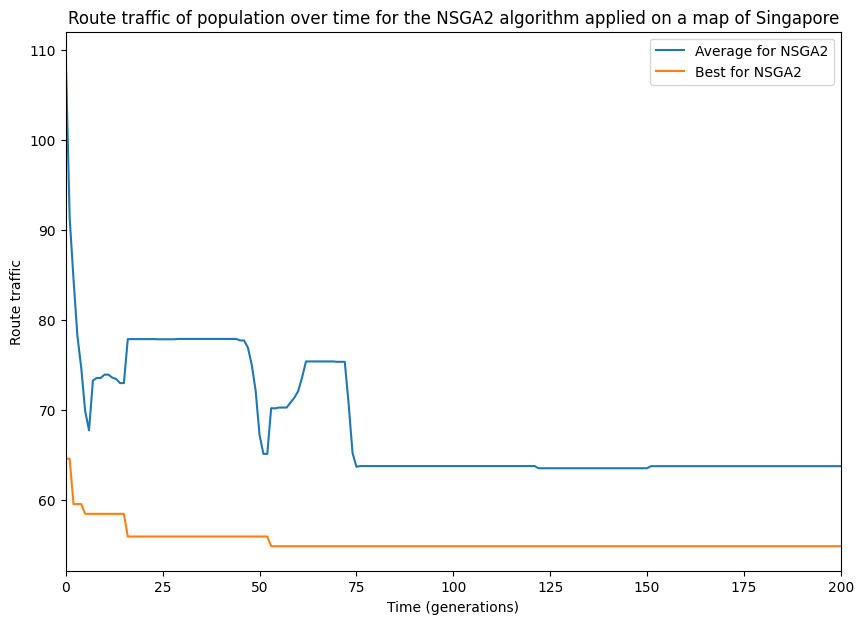

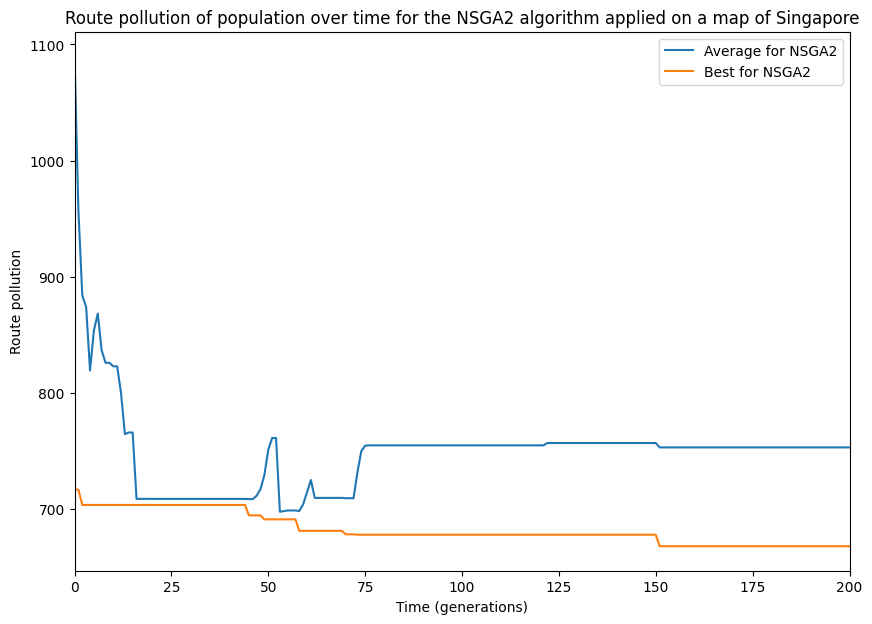

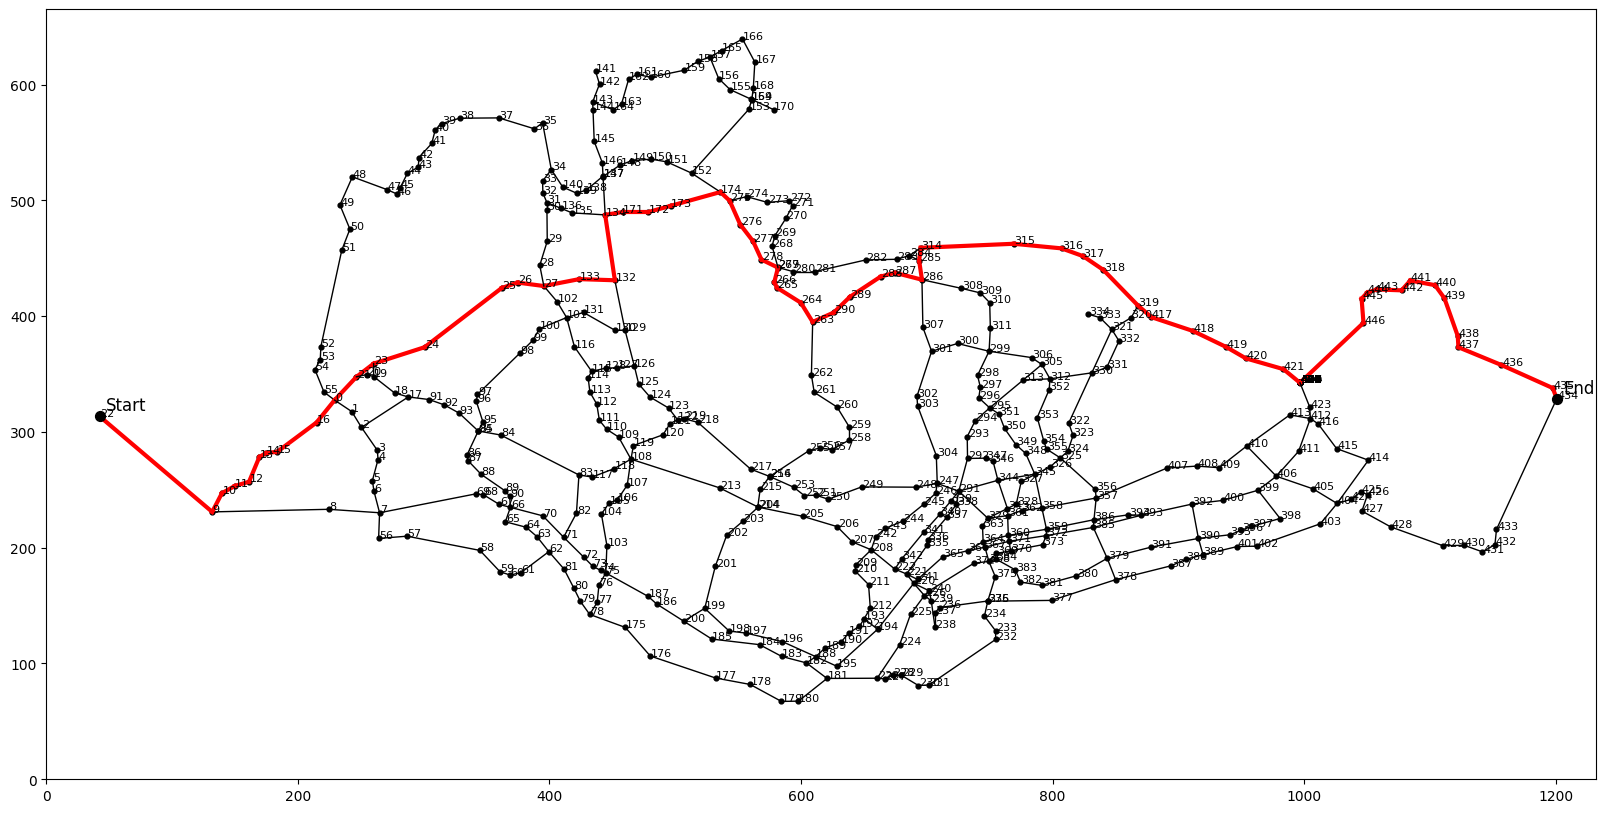

  4%|▍         | 8/200 [00:00<00:05, 33.75it/s]

Time fast_non_dominated_sort: 0.028584003448486328
Time crowding_distance_selection: 0.00138092041015625
Time fast_non_dominated_sort: 0.025716781616210938
Time crowding_distance_selection: 0.003158092498779297
Time fast_non_dominated_sort: 0.023901939392089844
Time crowding_distance_selection: 0.0014469623565673828
Time fast_non_dominated_sort: 0.022428274154663086
Time crowding_distance_selection: 0.003120899200439453
Time fast_non_dominated_sort: 0.022689104080200195
Time crowding_distance_selection: 0.0042040348052978516
Time fast_non_dominated_sort: 0.021762847900390625
Time crowding_distance_selection: 0.007737159729003906
Time fast_non_dominated_sort: 0.02278304100036621
Time crowding_distance_selection: 0.005458354949951172
Time fast_non_dominated_sort: 0.021927833557128906
Time crowding_distance_selection: 0.008373022079467773
Time fast_non_dominated_sort: 0.02328014373779297
Time crowding_distance_selection: 0.0050280094146728516


  8%|▊         | 16/200 [00:00<00:05, 32.53it/s]

Time fast_non_dominated_sort: 0.023114919662475586
Time crowding_distance_selection: 0.007995128631591797
Time fast_non_dominated_sort: 0.0225069522857666
Time crowding_distance_selection: 0.0030670166015625
Time fast_non_dominated_sort: 0.021420001983642578
Time crowding_distance_selection: 0.004069328308105469
Time fast_non_dominated_sort: 0.02379298210144043
Time crowding_distance_selection: 0.006346225738525391
Time fast_non_dominated_sort: 0.021448850631713867
Time crowding_distance_selection: 0.007623195648193359
Time fast_non_dominated_sort: 0.02143692970275879
Time crowding_distance_selection: 0.008232831954956055
Time fast_non_dominated_sort: 0.022948265075683594
Time crowding_distance_selection: 0.005913972854614258
Time fast_non_dominated_sort: 0.02141094207763672
Time crowding_distance_selection: 0.007281303405761719
Time fast_non_dominated_sort: 0.021374940872192383
Time crowding_distance_selection: 0.007425069808959961


 12%|█▏        | 24/200 [00:00<00:05, 33.09it/s]

Time fast_non_dominated_sort: 0.022507905960083008
Time crowding_distance_selection: 0.0051801204681396484
Time fast_non_dominated_sort: 0.02098679542541504
Time crowding_distance_selection: 0.007269859313964844
Time fast_non_dominated_sort: 0.022301912307739258
Time crowding_distance_selection: 0.004442930221557617
Time fast_non_dominated_sort: 0.02128005027770996
Time crowding_distance_selection: 0.006376981735229492
Time fast_non_dominated_sort: 0.020949840545654297
Time crowding_distance_selection: 0.006340742111206055
Time fast_non_dominated_sort: 0.02098822593688965
Time crowding_distance_selection: 0.005579948425292969
Time fast_non_dominated_sort: 0.021485090255737305
Time crowding_distance_selection: 0.006337881088256836
Time fast_non_dominated_sort: 0.020454883575439453
Time crowding_distance_selection: 0.00805521011352539
Time fast_non_dominated_sort: 0.020763874053955078


 16%|█▌        | 32/200 [00:00<00:05, 33.44it/s]

Time crowding_distance_selection: 0.007367849349975586
Time fast_non_dominated_sort: 0.02043604850769043
Time crowding_distance_selection: 0.006358146667480469
Time fast_non_dominated_sort: 0.021229028701782227
Time crowding_distance_selection: 0.007778167724609375
Time fast_non_dominated_sort: 0.023224830627441406
Time crowding_distance_selection: 0.006865978240966797
Time fast_non_dominated_sort: 0.020756006240844727
Time crowding_distance_selection: 0.007915973663330078
Time fast_non_dominated_sort: 0.020715951919555664
Time crowding_distance_selection: 0.005751132965087891
Time fast_non_dominated_sort: 0.020582914352416992
Time crowding_distance_selection: 0.007896184921264648
Time fast_non_dominated_sort: 0.021263837814331055
Time crowding_distance_selection: 0.006529092788696289
Time fast_non_dominated_sort: 0.021600008010864258


 20%|██        | 40/200 [00:01<00:04, 33.75it/s]

Time crowding_distance_selection: 0.005775928497314453
Time fast_non_dominated_sort: 0.020948171615600586
Time crowding_distance_selection: 0.00725102424621582
Time fast_non_dominated_sort: 0.021990060806274414
Time crowding_distance_selection: 0.006535053253173828
Time fast_non_dominated_sort: 0.022587299346923828
Time crowding_distance_selection: 0.0054018497467041016
Time fast_non_dominated_sort: 0.0224912166595459
Time crowding_distance_selection: 0.005610942840576172
Time fast_non_dominated_sort: 0.020647287368774414
Time crowding_distance_selection: 0.005713224411010742
Time fast_non_dominated_sort: 0.021274805068969727
Time crowding_distance_selection: 0.0071260929107666016
Time fast_non_dominated_sort: 0.020957231521606445
Time crowding_distance_selection: 0.007402181625366211
Time fast_non_dominated_sort: 0.021399974822998047


 24%|██▍       | 48/200 [00:01<00:04, 33.55it/s]

Time crowding_distance_selection: 0.00665593147277832
Time fast_non_dominated_sort: 0.021118879318237305
Time crowding_distance_selection: 0.006470203399658203
Time fast_non_dominated_sort: 0.02254319190979004
Time crowding_distance_selection: 0.005043983459472656
Time fast_non_dominated_sort: 0.021633148193359375
Time crowding_distance_selection: 0.004740238189697266
Time fast_non_dominated_sort: 0.021239042282104492
Time crowding_distance_selection: 0.0072438716888427734
Time fast_non_dominated_sort: 0.020328283309936523
Time crowding_distance_selection: 0.007832050323486328
Time fast_non_dominated_sort: 0.02145218849182129
Time crowding_distance_selection: 0.005130290985107422
Time fast_non_dominated_sort: 0.021758317947387695
Time crowding_distance_selection: 0.0053060054779052734
Time fast_non_dominated_sort: 0.021405935287475586


 28%|██▊       | 56/200 [00:01<00:04, 33.84it/s]

Time crowding_distance_selection: 0.006537914276123047
Time fast_non_dominated_sort: 0.020579099655151367
Time crowding_distance_selection: 0.007817983627319336
Time fast_non_dominated_sort: 0.02175307273864746
Time crowding_distance_selection: 0.00569915771484375
Time fast_non_dominated_sort: 0.021953105926513672
Time crowding_distance_selection: 0.005717039108276367
Time fast_non_dominated_sort: 0.022117137908935547
Time crowding_distance_selection: 0.006293058395385742
Time fast_non_dominated_sort: 0.02162623405456543
Time crowding_distance_selection: 0.006315946578979492
Time fast_non_dominated_sort: 0.020714998245239258
Time crowding_distance_selection: 0.007066965103149414
Time fast_non_dominated_sort: 0.020535707473754883
Time crowding_distance_selection: 0.00794076919555664
Time fast_non_dominated_sort: 0.0206298828125
Time crowding_distance_selection: 0.003817319869995117


 32%|███▏      | 64/200 [00:01<00:03, 34.19it/s]

Time fast_non_dominated_sort: 0.021262645721435547
Time crowding_distance_selection: 0.005619049072265625
Time fast_non_dominated_sort: 0.022382020950317383
Time crowding_distance_selection: 0.0069179534912109375
Time fast_non_dominated_sort: 0.02177596092224121
Time crowding_distance_selection: 0.007255077362060547
Time fast_non_dominated_sort: 0.021190166473388672
Time crowding_distance_selection: 0.005600929260253906
Time fast_non_dominated_sort: 0.020323753356933594
Time crowding_distance_selection: 0.006963968276977539
Time fast_non_dominated_sort: 0.020063161849975586
Time crowding_distance_selection: 0.00785374641418457
Time fast_non_dominated_sort: 0.020906686782836914
Time crowding_distance_selection: 0.0062940120697021484
Time fast_non_dominated_sort: 0.02020406723022461
Time crowding_distance_selection: 0.0077228546142578125


 36%|███▌      | 72/200 [00:02<00:03, 34.16it/s]

Time fast_non_dominated_sort: 0.020982027053833008
Time crowding_distance_selection: 0.006251096725463867
Time fast_non_dominated_sort: 0.022034168243408203
Time crowding_distance_selection: 0.006464958190917969
Time fast_non_dominated_sort: 0.02118825912475586
Time crowding_distance_selection: 0.007333040237426758
Time fast_non_dominated_sort: 0.021238088607788086
Time crowding_distance_selection: 0.006348848342895508
Time fast_non_dominated_sort: 0.020779848098754883
Time crowding_distance_selection: 0.006474018096923828
Time fast_non_dominated_sort: 0.021914958953857422
Time crowding_distance_selection: 0.00591588020324707
Time fast_non_dominated_sort: 0.02056288719177246
Time crowding_distance_selection: 0.008163690567016602
Time fast_non_dominated_sort: 0.020808935165405273
Time crowding_distance_selection: 0.007333040237426758


 40%|████      | 80/200 [00:02<00:03, 34.41it/s]

Time fast_non_dominated_sort: 0.020787954330444336
Time crowding_distance_selection: 0.006640911102294922
Time fast_non_dominated_sort: 0.022629261016845703
Time crowding_distance_selection: 0.005181789398193359
Time fast_non_dominated_sort: 0.020425796508789062
Time crowding_distance_selection: 0.008054018020629883
Time fast_non_dominated_sort: 0.021902084350585938
Time crowding_distance_selection: 0.006501913070678711
Time fast_non_dominated_sort: 0.02173590660095215
Time crowding_distance_selection: 0.005092144012451172
Time fast_non_dominated_sort: 0.02066779136657715
Time crowding_distance_selection: 0.0077991485595703125
Time fast_non_dominated_sort: 0.02243185043334961
Time crowding_distance_selection: 0.004635334014892578
Time fast_non_dominated_sort: 0.02194690704345703


 44%|████▍     | 88/200 [00:02<00:03, 33.76it/s]

Time crowding_distance_selection: 0.005034923553466797
Time fast_non_dominated_sort: 0.021437883377075195
Time crowding_distance_selection: 0.006359100341796875
Time fast_non_dominated_sort: 0.021576881408691406
Time crowding_distance_selection: 0.0065631866455078125
Time fast_non_dominated_sort: 0.021912097930908203
Time crowding_distance_selection: 0.0061283111572265625
Time fast_non_dominated_sort: 0.02134394645690918
Time crowding_distance_selection: 0.006596088409423828
Time fast_non_dominated_sort: 0.020746946334838867
Time crowding_distance_selection: 0.006237030029296875
Time fast_non_dominated_sort: 0.021112918853759766
Time crowding_distance_selection: 0.007094860076904297
Time fast_non_dominated_sort: 0.021329164505004883
Time crowding_distance_selection: 0.0060160160064697266
Time fast_non_dominated_sort: 0.02098393440246582
Time crowding_distance_selection: 0.007946968078613281


 48%|████▊     | 96/200 [00:02<00:03, 33.56it/s]

Time fast_non_dominated_sort: 0.02115011215209961
Time crowding_distance_selection: 0.007508039474487305
Time fast_non_dominated_sort: 0.024259090423583984
Time crowding_distance_selection: 0.0073549747467041016
Time fast_non_dominated_sort: 0.022762060165405273
Time crowding_distance_selection: 0.005210161209106445
Time fast_non_dominated_sort: 0.020863056182861328
Time crowding_distance_selection: 0.006445169448852539
Time fast_non_dominated_sort: 0.02091193199157715
Time crowding_distance_selection: 0.006459951400756836
Time fast_non_dominated_sort: 0.020679712295532227
Time crowding_distance_selection: 0.007975339889526367
Time fast_non_dominated_sort: 0.02127981185913086
Time crowding_distance_selection: 0.007376194000244141
Time fast_non_dominated_sort: 0.0205080509185791


 52%|█████▏    | 104/200 [00:03<00:02, 33.95it/s]

Time crowding_distance_selection: 0.008111953735351562
Time fast_non_dominated_sort: 0.02080821990966797
Time crowding_distance_selection: 0.007237911224365234
Time fast_non_dominated_sort: 0.021065950393676758
Time crowding_distance_selection: 0.00723576545715332
Time fast_non_dominated_sort: 0.02187204360961914
Time crowding_distance_selection: 0.006729841232299805
Time fast_non_dominated_sort: 0.02135491371154785
Time crowding_distance_selection: 0.007149934768676758
Time fast_non_dominated_sort: 0.02059006690979004
Time crowding_distance_selection: 0.007149219512939453
Time fast_non_dominated_sort: 0.021212339401245117
Time crowding_distance_selection: 0.0062198638916015625
Time fast_non_dominated_sort: 0.021504878997802734
Time crowding_distance_selection: 0.006507158279418945
Time fast_non_dominated_sort: 0.020444869995117188
Time crowding_distance_selection: 0.007091999053955078


 56%|█████▌    | 112/200 [00:03<00:02, 33.76it/s]

Time fast_non_dominated_sort: 0.020388126373291016
Time crowding_distance_selection: 0.006583213806152344
Time fast_non_dominated_sort: 0.021744966506958008
Time crowding_distance_selection: 0.007311105728149414
Time fast_non_dominated_sort: 0.020870208740234375
Time crowding_distance_selection: 0.007501125335693359
Time fast_non_dominated_sort: 0.022336959838867188
Time crowding_distance_selection: 0.005982875823974609
Time fast_non_dominated_sort: 0.02195000648498535
Time crowding_distance_selection: 0.0056459903717041016
Time fast_non_dominated_sort: 0.020880937576293945
Time crowding_distance_selection: 0.00646209716796875
Time fast_non_dominated_sort: 0.02129507064819336
Time crowding_distance_selection: 0.00596308708190918
Time fast_non_dominated_sort: 0.022485017776489258


 60%|██████    | 120/200 [00:03<00:02, 33.81it/s]

Time crowding_distance_selection: 0.005278110504150391
Time fast_non_dominated_sort: 0.02053523063659668
Time crowding_distance_selection: 0.007943391799926758
Time fast_non_dominated_sort: 0.021012067794799805
Time crowding_distance_selection: 0.008182048797607422
Time fast_non_dominated_sort: 0.021661043167114258
Time crowding_distance_selection: 0.005836009979248047
Time fast_non_dominated_sort: 0.02104330062866211
Time crowding_distance_selection: 0.0063440799713134766
Time fast_non_dominated_sort: 0.020724058151245117
Time crowding_distance_selection: 0.0069370269775390625
Time fast_non_dominated_sort: 0.020841121673583984
Time crowding_distance_selection: 0.007189035415649414
Time fast_non_dominated_sort: 0.0220181941986084
Time crowding_distance_selection: 0.006048917770385742
Time fast_non_dominated_sort: 0.022196054458618164
Time crowding_distance_selection: 0.006536960601806641


 64%|██████▍   | 128/200 [00:03<00:02, 33.45it/s]

Time fast_non_dominated_sort: 0.02220320701599121
Time crowding_distance_selection: 0.004961967468261719
Time fast_non_dominated_sort: 0.02146625518798828
Time crowding_distance_selection: 0.0067288875579833984
Time fast_non_dominated_sort: 0.020864009857177734
Time crowding_distance_selection: 0.008442878723144531
Time fast_non_dominated_sort: 0.020740985870361328
Time crowding_distance_selection: 0.007928133010864258
Time fast_non_dominated_sort: 0.021747827529907227
Time crowding_distance_selection: 0.006471157073974609
Time fast_non_dominated_sort: 0.022084951400756836
Time crowding_distance_selection: 0.0049898624420166016
Time fast_non_dominated_sort: 0.020680904388427734
Time crowding_distance_selection: 0.005895853042602539
Time fast_non_dominated_sort: 0.020452022552490234


 68%|██████▊   | 136/200 [00:04<00:01, 33.67it/s]

Time crowding_distance_selection: 0.0069620609283447266
Time fast_non_dominated_sort: 0.020553112030029297
Time crowding_distance_selection: 0.0069081783294677734
Time fast_non_dominated_sort: 0.020710229873657227
Time crowding_distance_selection: 0.007873058319091797
Time fast_non_dominated_sort: 0.021357059478759766
Time crowding_distance_selection: 0.005129098892211914
Time fast_non_dominated_sort: 0.023183107376098633
Time crowding_distance_selection: 0.006577014923095703
Time fast_non_dominated_sort: 0.02171802520751953
Time crowding_distance_selection: 0.007237911224365234
Time fast_non_dominated_sort: 0.021541118621826172
Time crowding_distance_selection: 0.007149934768676758
Time fast_non_dominated_sort: 0.021406173706054688
Time crowding_distance_selection: 0.006685972213745117
Time fast_non_dominated_sort: 0.020706892013549805
Time crowding_distance_selection: 0.008043050765991211


 72%|███████▏  | 144/200 [00:04<00:01, 33.58it/s]

Time fast_non_dominated_sort: 0.02138996124267578
Time crowding_distance_selection: 0.006430864334106445
Time fast_non_dominated_sort: 0.021632909774780273
Time crowding_distance_selection: 0.007366180419921875
Time fast_non_dominated_sort: 0.021301984786987305
Time crowding_distance_selection: 0.007452249526977539
Time fast_non_dominated_sort: 0.021554946899414062
Time crowding_distance_selection: 0.00745391845703125
Time fast_non_dominated_sort: 0.020978927612304688
Time crowding_distance_selection: 0.006536960601806641
Time fast_non_dominated_sort: 0.021724939346313477
Time crowding_distance_selection: 0.005789041519165039
Time fast_non_dominated_sort: 0.020587921142578125
Time crowding_distance_selection: 0.007227182388305664
Time fast_non_dominated_sort: 0.021021127700805664


 76%|███████▌  | 152/200 [00:04<00:01, 33.86it/s]

Time crowding_distance_selection: 0.006660938262939453
Time fast_non_dominated_sort: 0.020416975021362305
Time crowding_distance_selection: 0.006282806396484375
Time fast_non_dominated_sort: 0.022222042083740234
Time crowding_distance_selection: 0.004702091217041016
Time fast_non_dominated_sort: 0.022270917892456055
Time crowding_distance_selection: 0.0060770511627197266
Time fast_non_dominated_sort: 0.02158808708190918
Time crowding_distance_selection: 0.005888700485229492
Time fast_non_dominated_sort: 0.021162986755371094
Time crowding_distance_selection: 0.005675792694091797
Time fast_non_dominated_sort: 0.021283864974975586
Time crowding_distance_selection: 0.005105733871459961
Time fast_non_dominated_sort: 0.0202639102935791
Time crowding_distance_selection: 0.00791025161743164
Time fast_non_dominated_sort: 0.02086806297302246
Time crowding_distance_selection: 0.006248950958251953


 80%|████████  | 160/200 [00:04<00:01, 34.33it/s]

Time fast_non_dominated_sort: 0.021139860153198242
Time crowding_distance_selection: 0.0050351619720458984
Time fast_non_dominated_sort: 0.020925045013427734
Time crowding_distance_selection: 0.006416797637939453
Time fast_non_dominated_sort: 0.02186274528503418
Time crowding_distance_selection: 0.005853176116943359
Time fast_non_dominated_sort: 0.021200180053710938
Time crowding_distance_selection: 0.005690097808837891
Time fast_non_dominated_sort: 0.021181821823120117
Time crowding_distance_selection: 0.004987955093383789
Time fast_non_dominated_sort: 0.020503997802734375
Time crowding_distance_selection: 0.007061004638671875
Time fast_non_dominated_sort: 0.02093791961669922
Time crowding_distance_selection: 0.005606889724731445
Time fast_non_dominated_sort: 0.02110600471496582
Time crowding_distance_selection: 0.00705409049987793


 84%|████████▍ | 168/200 [00:04<00:00, 33.87it/s]

Time fast_non_dominated_sort: 0.020694971084594727
Time crowding_distance_selection: 0.006334066390991211
Time fast_non_dominated_sort: 0.020876169204711914
Time crowding_distance_selection: 0.006234169006347656
Time fast_non_dominated_sort: 0.021340131759643555
Time crowding_distance_selection: 0.0064547061920166016
Time fast_non_dominated_sort: 0.024311065673828125
Time crowding_distance_selection: 0.008593320846557617
Time fast_non_dominated_sort: 0.020661115646362305
Time crowding_distance_selection: 0.0063648223876953125
Time fast_non_dominated_sort: 0.021531105041503906
Time crowding_distance_selection: 0.00391697883605957
Time fast_non_dominated_sort: 0.021329164505004883
Time crowding_distance_selection: 0.005722761154174805
Time fast_non_dominated_sort: 0.020676851272583008


 88%|████████▊ | 176/200 [00:05<00:00, 34.03it/s]

Time crowding_distance_selection: 0.006358146667480469
Time fast_non_dominated_sort: 0.020768165588378906
Time crowding_distance_selection: 0.006276845932006836
Time fast_non_dominated_sort: 0.021260976791381836
Time crowding_distance_selection: 0.005554914474487305
Time fast_non_dominated_sort: 0.020318984985351562
Time crowding_distance_selection: 0.007912874221801758
Time fast_non_dominated_sort: 0.022257328033447266
Time crowding_distance_selection: 0.005697965621948242
Time fast_non_dominated_sort: 0.020457029342651367
Time crowding_distance_selection: 0.006234884262084961
Time fast_non_dominated_sort: 0.020982027053833008
Time crowding_distance_selection: 0.00708317756652832
Time fast_non_dominated_sort: 0.020666837692260742
Time crowding_distance_selection: 0.0066297054290771484
Time fast_non_dominated_sort: 0.02091217041015625
Time crowding_distance_selection: 0.006389141082763672


 92%|█████████▏| 184/200 [00:05<00:00, 34.48it/s]

Time fast_non_dominated_sort: 0.020691871643066406
Time crowding_distance_selection: 0.006233930587768555
Time fast_non_dominated_sort: 0.021235942840576172
Time crowding_distance_selection: 0.0065729618072509766
Time fast_non_dominated_sort: 0.02088618278503418
Time crowding_distance_selection: 0.006409883499145508
Time fast_non_dominated_sort: 0.02134394645690918
Time crowding_distance_selection: 0.006562232971191406
Time fast_non_dominated_sort: 0.020292997360229492
Time crowding_distance_selection: 0.007908105850219727
Time fast_non_dominated_sort: 0.020897865295410156
Time crowding_distance_selection: 0.0057871341705322266
Time fast_non_dominated_sort: 0.02114701271057129
Time crowding_distance_selection: 0.005097866058349609
Time fast_non_dominated_sort: 0.02084803581237793
Time crowding_distance_selection: 0.004415988922119141


 96%|█████████▌| 192/200 [00:05<00:00, 33.96it/s]

Time fast_non_dominated_sort: 0.02091813087463379
Time crowding_distance_selection: 0.0056378841400146484
Time fast_non_dominated_sort: 0.022245168685913086
Time crowding_distance_selection: 0.005197048187255859
Time fast_non_dominated_sort: 0.021018028259277344
Time crowding_distance_selection: 0.005877971649169922
Time fast_non_dominated_sort: 0.020835161209106445
Time crowding_distance_selection: 0.006391763687133789
Time fast_non_dominated_sort: 0.020871877670288086
Time crowding_distance_selection: 0.0056378841400146484
Time fast_non_dominated_sort: 0.02067399024963379
Time crowding_distance_selection: 0.006286144256591797
Time fast_non_dominated_sort: 0.020975828170776367
Time crowding_distance_selection: 0.006458759307861328
Time fast_non_dominated_sort: 0.02082085609436035


100%|██████████| 200/200 [00:05<00:00, 33.59it/s]

Time crowding_distance_selection: 0.0056879520416259766
Time fast_non_dominated_sort: 0.019895076751708984
Time crowding_distance_selection: 0.007697105407714844
Time fast_non_dominated_sort: 0.020888090133666992
Time crowding_distance_selection: 0.006306171417236328
Time fast_non_dominated_sort: 0.021134138107299805
Time crowding_distance_selection: 0.006593942642211914
Time fast_non_dominated_sort: 0.021780014038085938
Time crowding_distance_selection: 0.006532907485961914
Time fast_non_dominated_sort: 0.02017998695373535
Time crowding_distance_selection: 0.006186962127685547


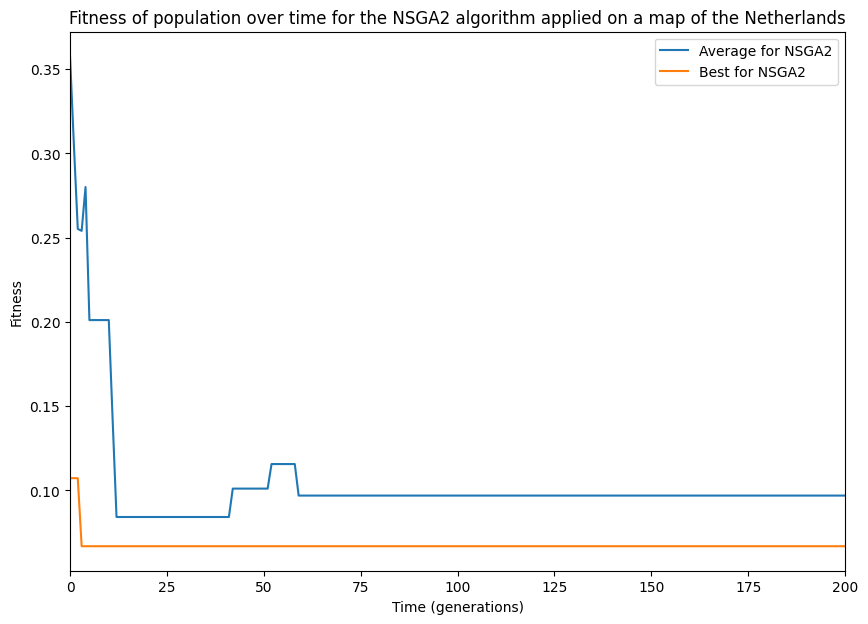

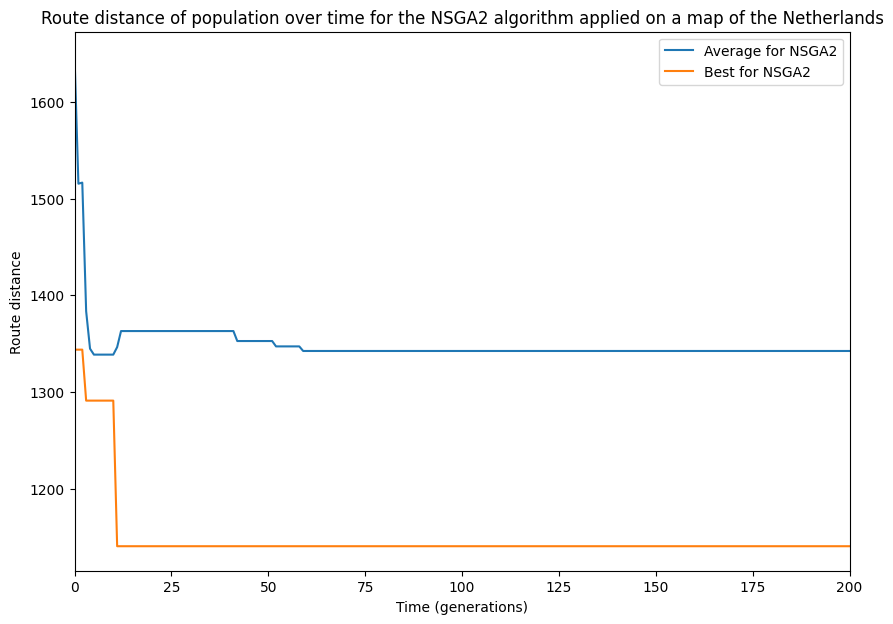

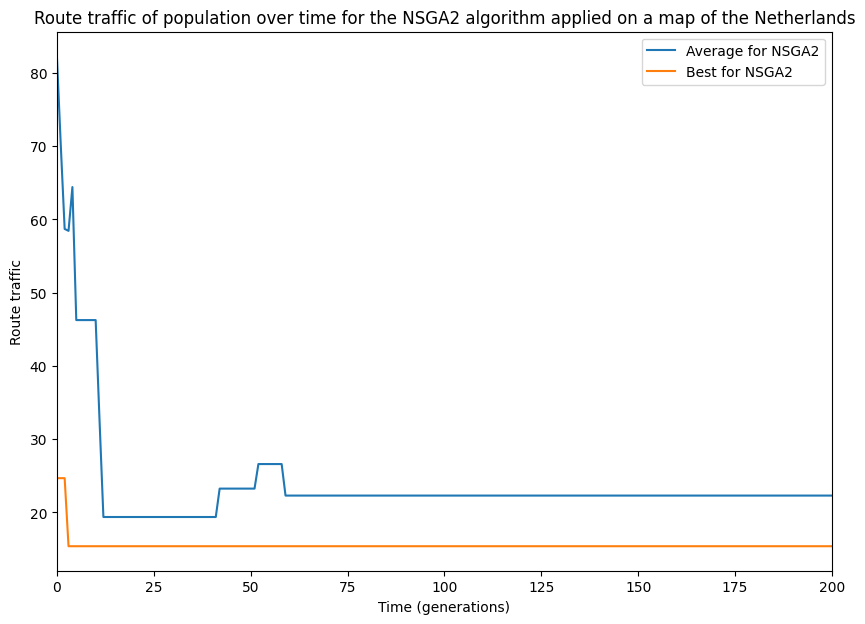

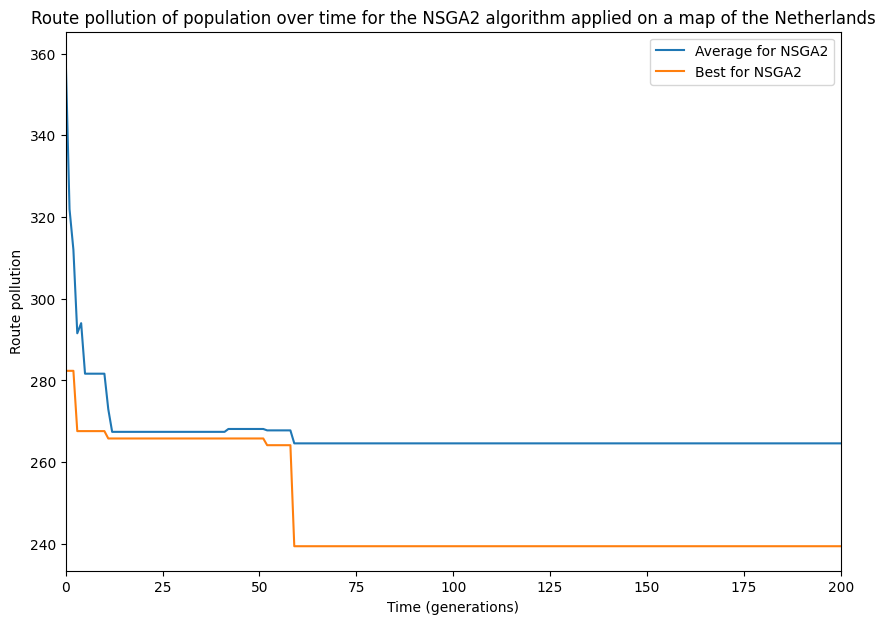

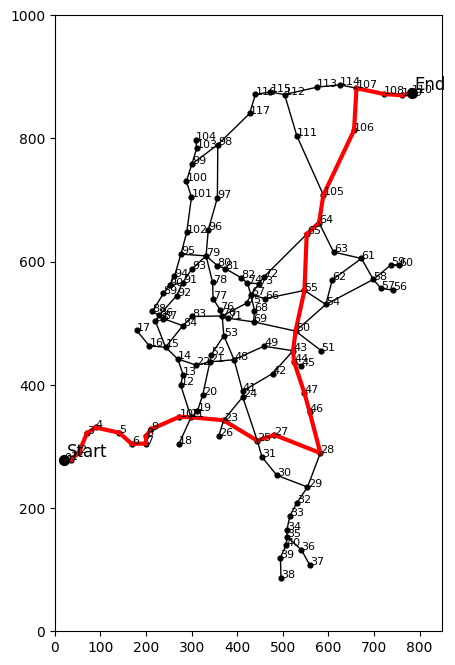

In [5]:
nr_generations = 200
weights = [0, 1, 0] # distance, traffic, pollution

pop_size_sg = 50
alg = nsga2.NSGA2(repr_sp, nr_generations, 22, 434, pop_size_sg, weights)
results = alg.run_algorithm(show_results=True, save_name="images/singapore")
repr_sp.plot_map(results[1], plot_nodes=True)

pop_size_nl = 10
alg = nsga2.NSGA2(repr_nl, nr_generations, 0, 110, pop_size_nl, weights)
results = alg.run_algorithm(show_results=True, save_name="images/netherlands")
repr_nl.plot_map(results[1], plot_nodes=True)